In [46]:
'''import snntorch as snn
from snntorch import spikeplot as splt
from snntorch import spikegen
'''
import torch
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt

In [47]:
time_step = 1e-3
R = 5
C = 1e-3
num_steps = 10000
def lif(U, time_step=1e-3, I=0, R=5e7, C=1e-10):
  tau = R*C
  U = U + (time_step/tau)*(-U + I*R)
  return U

## Neuron Models

In [48]:
def lif_with_threshold(U, I, Vth, time_step=time_step, R=R, C=C):
    spk=0
    if (U > Vth):
        U= -0.5
        spk=1
        return U,spk
    tau = R * C
    U = U + (time_step / tau) * (-U + I * R)
    return U,spk
def generate_U_spike(U):
    time = np.linspace(-0.02, 0.02, 30)  # Time points
    sigma = 0.01  # Small standard deviation for sharp spike
    amplitude = 1.5  # Amplitude of the spike
    delay = 0.0  # Delay of the spike

# Generate the sharp Gaussian spike
    Vth=1
    spike = amplitude * np.exp(-((time - delay) ** 2) / (2 * sigma ** 2))+Vth
    
    fall=np.linspace(U,-0.5,10)
    spike=np.concatenate((spike,fall))
    spike=spike.tolist()
    #spike.append((spike(len(spike)-1)-0.3)*0.67)
    R = 5
    C = 1e-3
    tau = R*C
    for i in range(18):
        mem=spike[len(spike)-1]
        I=0
        mem=mem + (time_step / tau) * (-mem + I * R)
        spike.append(mem)

    
    return spike
    
def generate_pulse():
    time = np.linspace(-0.02, 0.02, 15)  # Time points
    sigma = 0.01  # Small standard deviation for sharp spike
    amplitude = 1.0 # Amplitude of the spike
    delay = 0.0  # Delay of the spike

# Generate the sharp Gaussian spike
    spike = amplitude * np.exp(-((time - delay) ** 2) / (2 * sigma ** 2))*(1)
    fall=np.linspace(spike[len(spike)-1],-0.5,3)
    spike=np.concatenate((spike,fall))
    spike=spike.tolist()
    R = 5
    C = 1e-3
    tau = R*C
    for i in range(18):
        mem=spike[len(spike)-1]
        I=0
        mem=mem + (time_step / tau) * (-mem + I * R)
        spike.append(mem)

    
    return spike

def spk_with_threshold(U, I, Vth, time_step=time_step, R=R, C=C):
    spk = 0
    if U > Vth:
        U = generate_U_spike(U)
        spk = 1
        return U, spk
    tau = R * C
    U = [U + (time_step / tau) * (-U + I * R)]
    return U,spk

##                                                            Plotting Functions

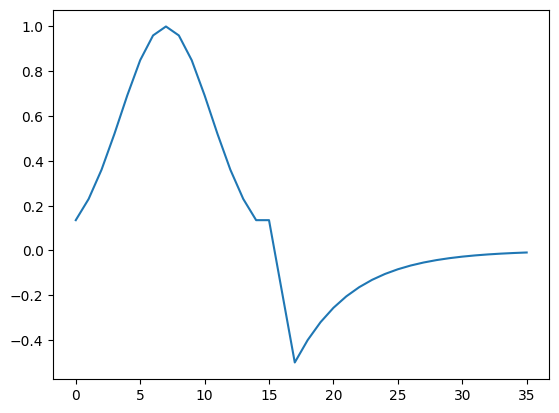

In [49]:
plt.plot(generate_pulse())

In [50]:

def memplot_phases(mem, pot,spk_rec, title):
    timesteps = list(range(len(mem)))
    fig, axs = plt.subplots(3, 1, figsize=(16, 12))

    # Plot membrane potential
    axs[0].plot(timesteps, mem, color='blue')
    axs[0].axhline(y=1, color='r', linestyle='--', label='Vth')
    axs[0].set_ylabel('Membrane Potential (mV)')
    axs[0].set_title(title)
    axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    spikes = [i for i, value in enumerate(cur_in) if value != 0]

    #timesteps = list(range(len(cur_in)))
    #axs[1].eventplot(spikes, color='red')
    '''axs[2].plot(timesteps,cur_in, color='black')
    axs[2].set_ylabel('Input spikes')
    axs[2].set_xlabel('Time (ms)')'''

    axs[1].plot(pot,color='green')
    axs[1].axhline(y=1, color='r', linestyle='--', label='Vth')
    axs[1].set_title("Membrane Potential")
    axs[1].set_ylabel("Membrane Potential (mV)")
    axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    spikes_spk_rec = [i for i, value in enumerate(spk_rec) if value != 0]
    axs[2].plot(spk_rec, color='red')
    axs[2].set_title('Output Spike')
    axs[2].set_ylabel('Output spikes(mA)')
    axs[2].set_xlabel('Time (ms)')

   
    plt.show()



    
def memplot(mem,max,title):
    timesteps = list(range(len(mem)))
    plt.figure(figsize=(16,6))
    plt.plot(timesteps, mem)
    
    # Draw a dotted line representing the threshold voltage (Vth)
    plt.axhline(y=1, color='r', linestyle='--', label='Vth')
    plt.axhline(y=0.0, color='g', linestyle='--', label='Resting Potential')
    plt.axhline(y=-0.5, color='b', linestyle='--', label='Hyperpolarization Potential')
    plt.axhline(y=max, color='black', linestyle='--', label='Maximum action Potential')
    plt.xlabel('Time (ms)')
    plt.ylabel('Membrane Potential (mV)')
    plt.title(title)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()


# Action potential schematic example:
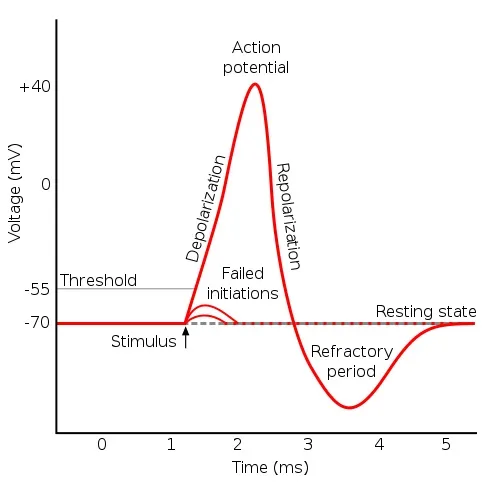
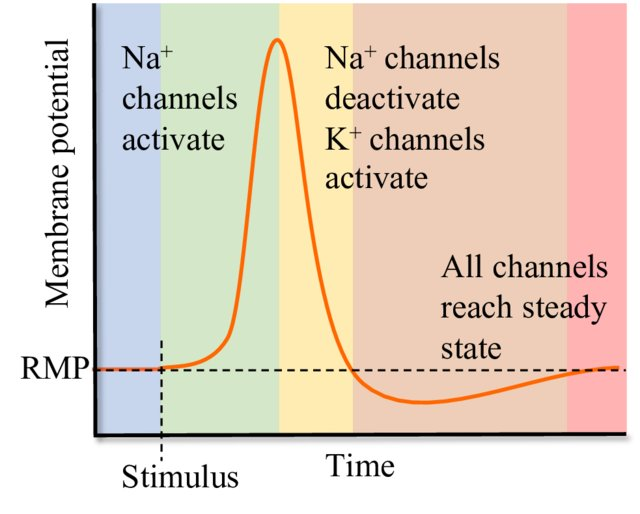

## Periodic Spike train input

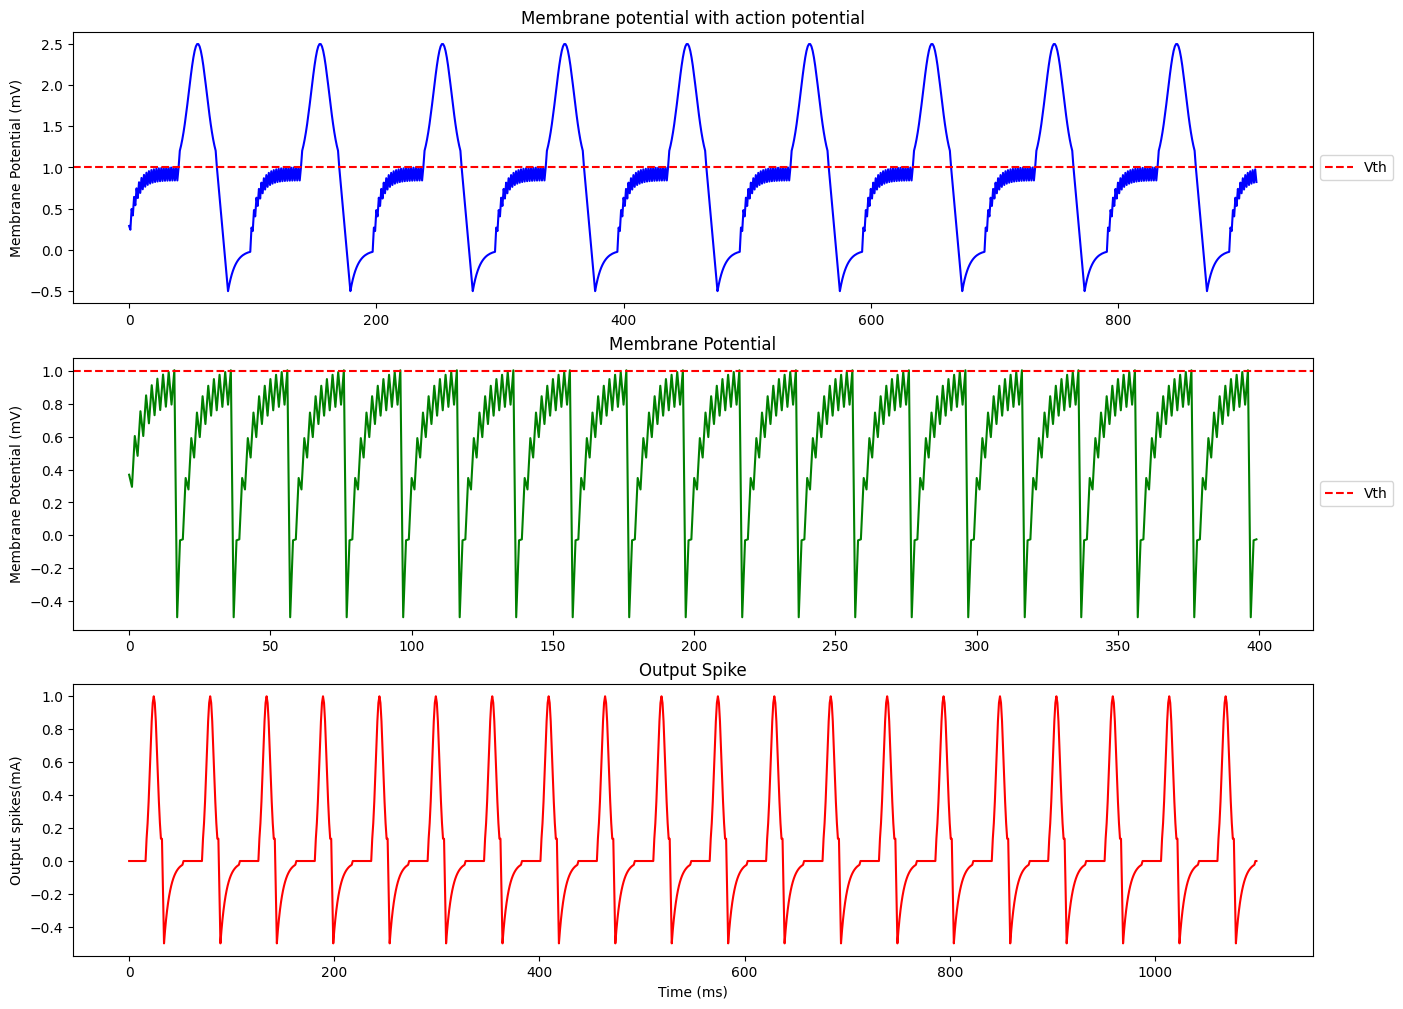

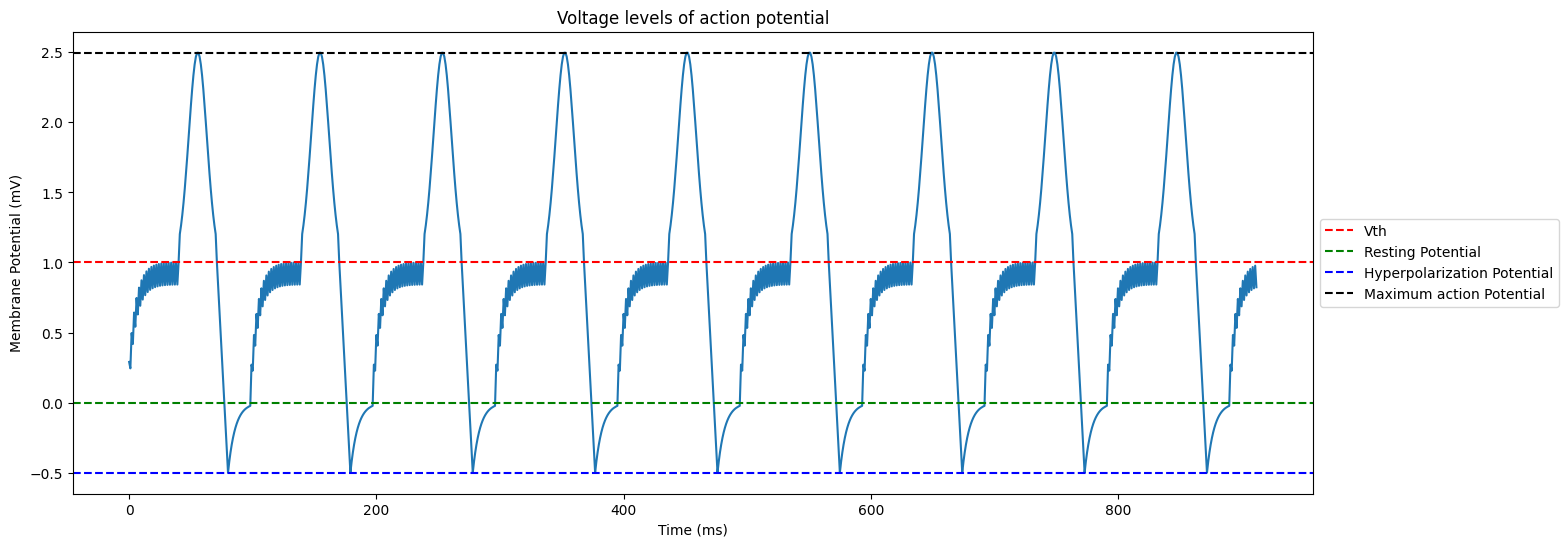

In [51]:

time_step = 0.787e-3
num_steps= 400
cur_in = np.zeros(num_steps)  # I=0 for all t
cur_in[::2] = 0.36887
mem=0
pot=[]
mem_arr=[0]
mem_rec=[]
spk_rec=[]
for step in range(num_steps):
    mem_arr,spk1= spk_with_threshold(mem_arr[len(mem_arr)-1], I=cur_in[step], time_step=time_step, Vth=1.00)
    mem,spk=lif_with_threshold(mem,I=cur_in[step],Vth=1.0)
    pot.append(mem)
    spk_rec.append(spk)
    mem_rec=mem_rec+mem_arr
mem_rec=np.array(mem_rec)
spk_rec=np.array(spk_rec)
spike=[]
for i in spk_rec:
    if(i==1):
        spike+=(generate_pulse())
    else:
        spike.append(0)
max=(mem_rec.max())

    
memplot_phases(mem_rec,pot,spike,'Membrane potential with action potential')
memplot(mem_rec,max,'Voltage levels of action potential')



## One action potential, single spike

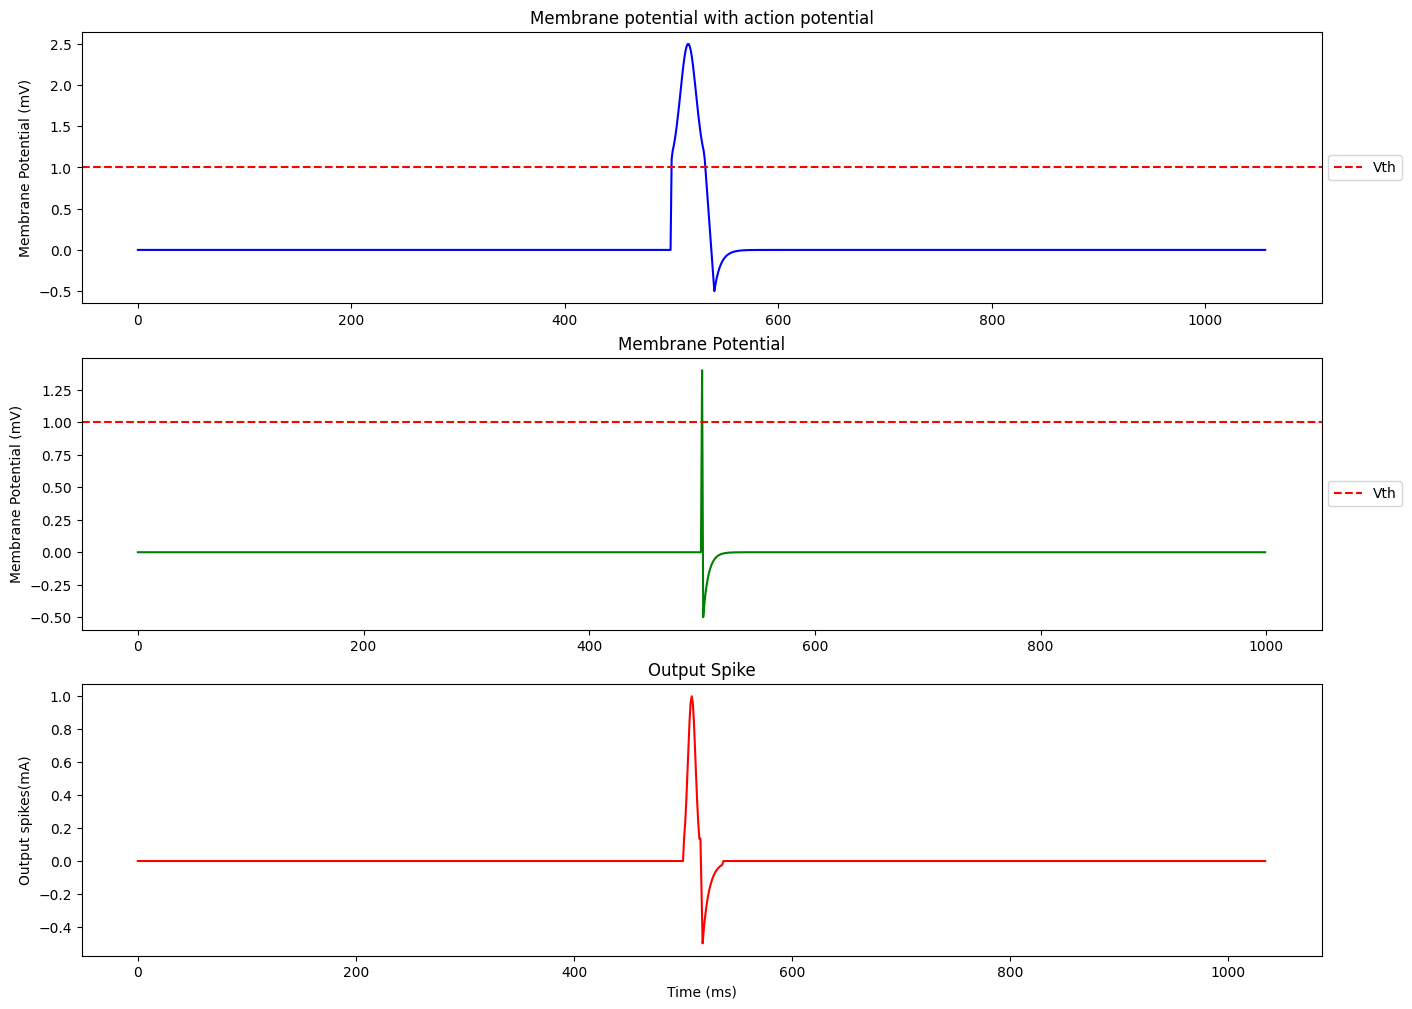

In [52]:
time_step = 0.787e-3
num_steps= 1000
cur_in = np.zeros(num_steps)  # I=0 for all t
cur_in[500] = 1.4
mem=0
pot=[]
mem_arr=[0]
mem_rec=[]
spk_rec=[]
for step in range(num_steps):
    mem_arr,spk1= spk_with_threshold(mem_arr[len(mem_arr)-1], I=cur_in[step], time_step=time_step, Vth=1.00)
    mem,spk=lif_with_threshold(mem,I=cur_in[step],Vth=1.0)
    pot.append(mem)
    spk_rec.append(spk)
    mem_rec=mem_rec+mem_arr
mem_rec=np.array(mem_rec)
spk_rec=np.array(spk_rec)
spike=[]
for i in spk_rec:
    if(i==1):
        spike+=(generate_pulse())
    else:
        spike.append(0)
memplot_phases(mem_rec,pot,spike,'Membrane potential with action potential')



## Rate coded spike inputs for different spike probabilities

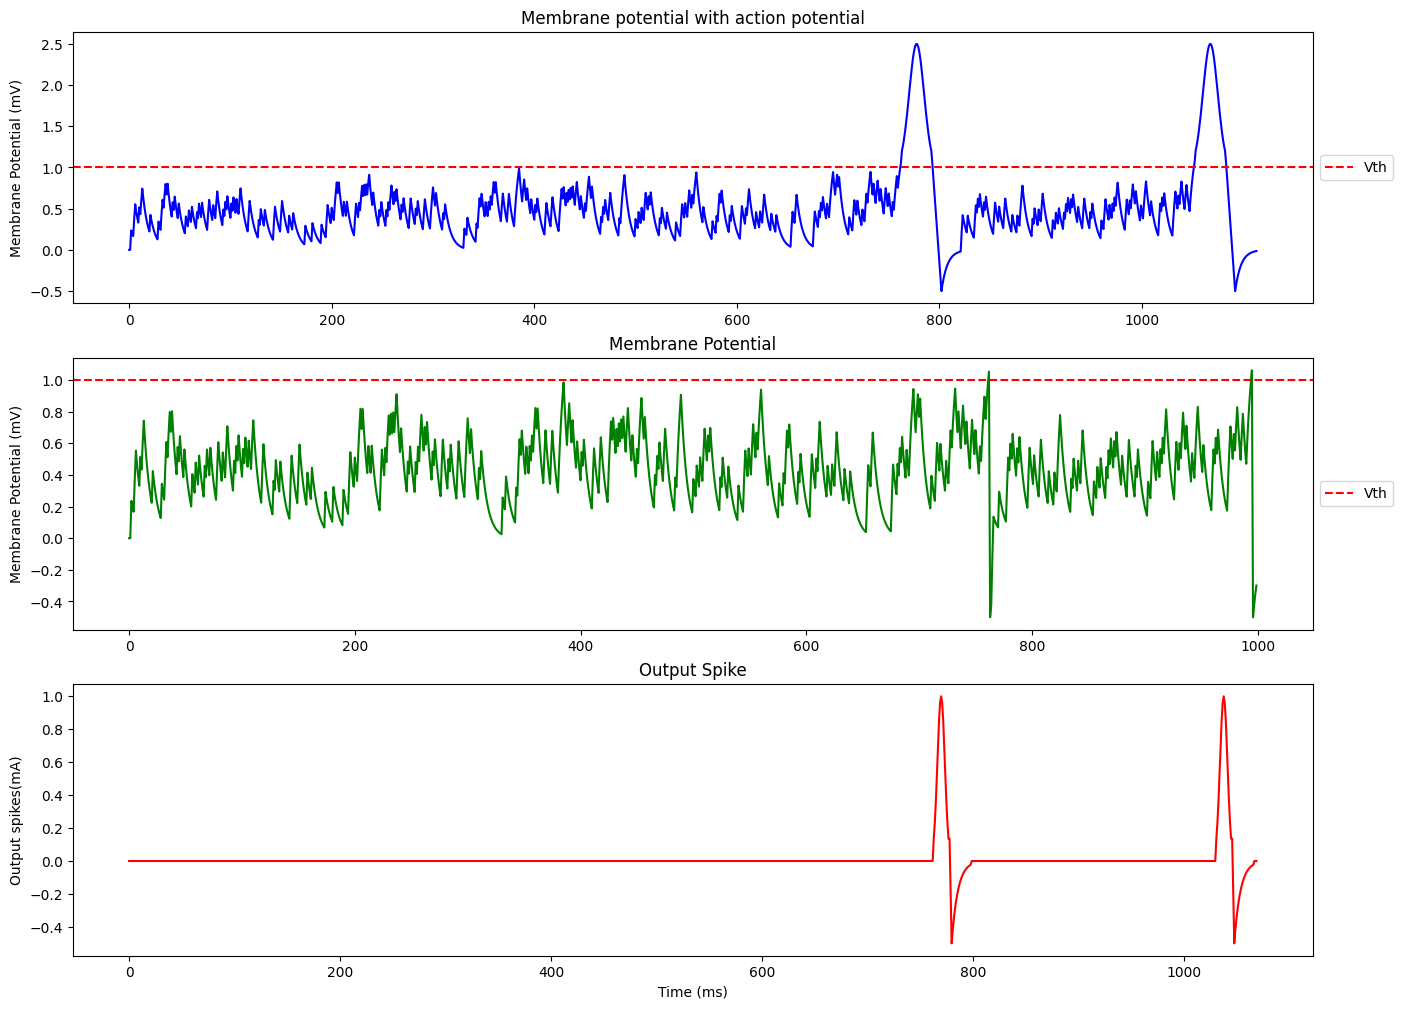

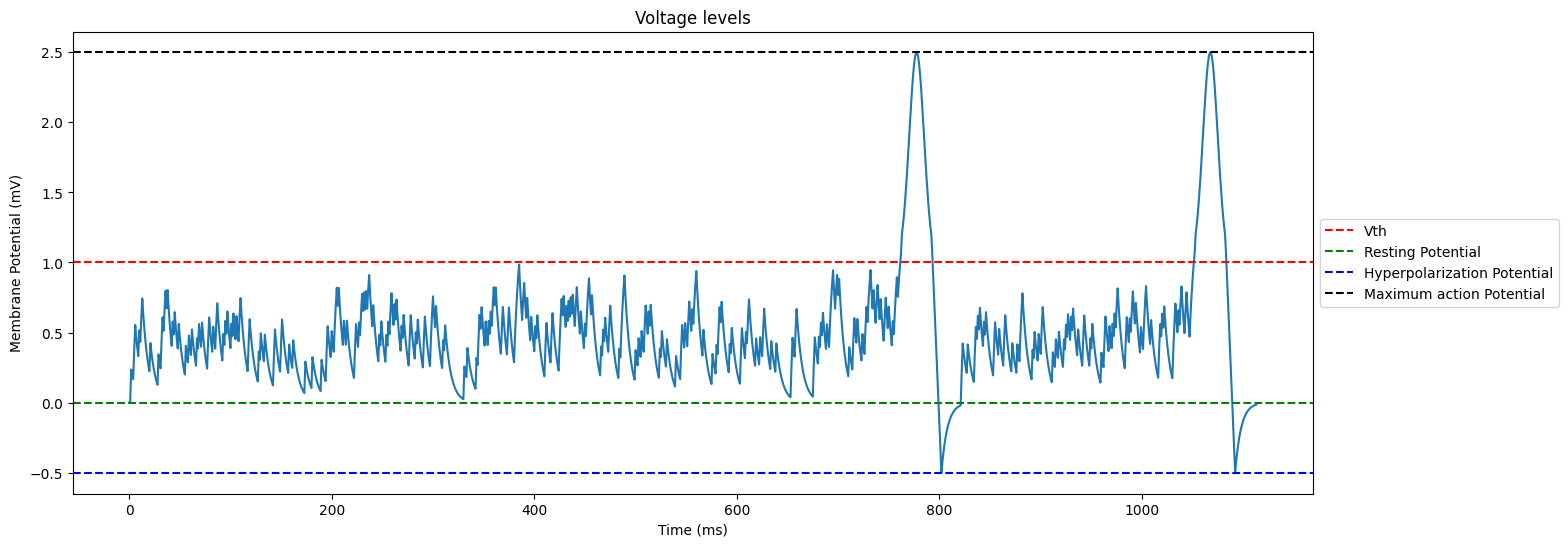

In [64]:
time_step = 0.787e-3
def generate_random_array(value, probability, num_steps):
    random_array = np.random.choice([0, value], size=num_steps, p=[1 - probability, probability])
    return random_array

# Example usage:
num_steps = 1000
value = 0.3
probability = 0.30
cur_in = generate_random_array(value, probability, num_steps)
mem=0
pot=[]
mem_arr=[0]
mem_rec=[]
spk_rec=[]
for step in range(num_steps):
    
    mem_arr,spk1= spk_with_threshold(mem_arr[len(mem_arr)-1], I=cur_in[step], time_step=time_step, Vth=1)
    mem,spk=lif_with_threshold(mem,I=cur_in[step],time_step=time_step,Vth=1)
    pot.append(mem)
    spk_rec.append(spk)
    mem_arr[len(mem_arr)-1]=mem_arr[len(mem_arr)-1]
    mem_rec=mem_rec+mem_arr
mem_rec=np.array(mem_rec)
max=(mem_rec.max())
if(max<2.5):
    max=2.5
pot=np.array(pot)
spk_rec=np.array(spk_rec)
spike=[]
for i in spk_rec:
    if(i==1):
        spike+=(generate_pulse())
    else:
        spike.append(0)
memplot_phases(mem_rec,pot,spike,'Membrane potential with action potential')

memplot(mem_rec,max,'Voltage levels')


# Noise effect

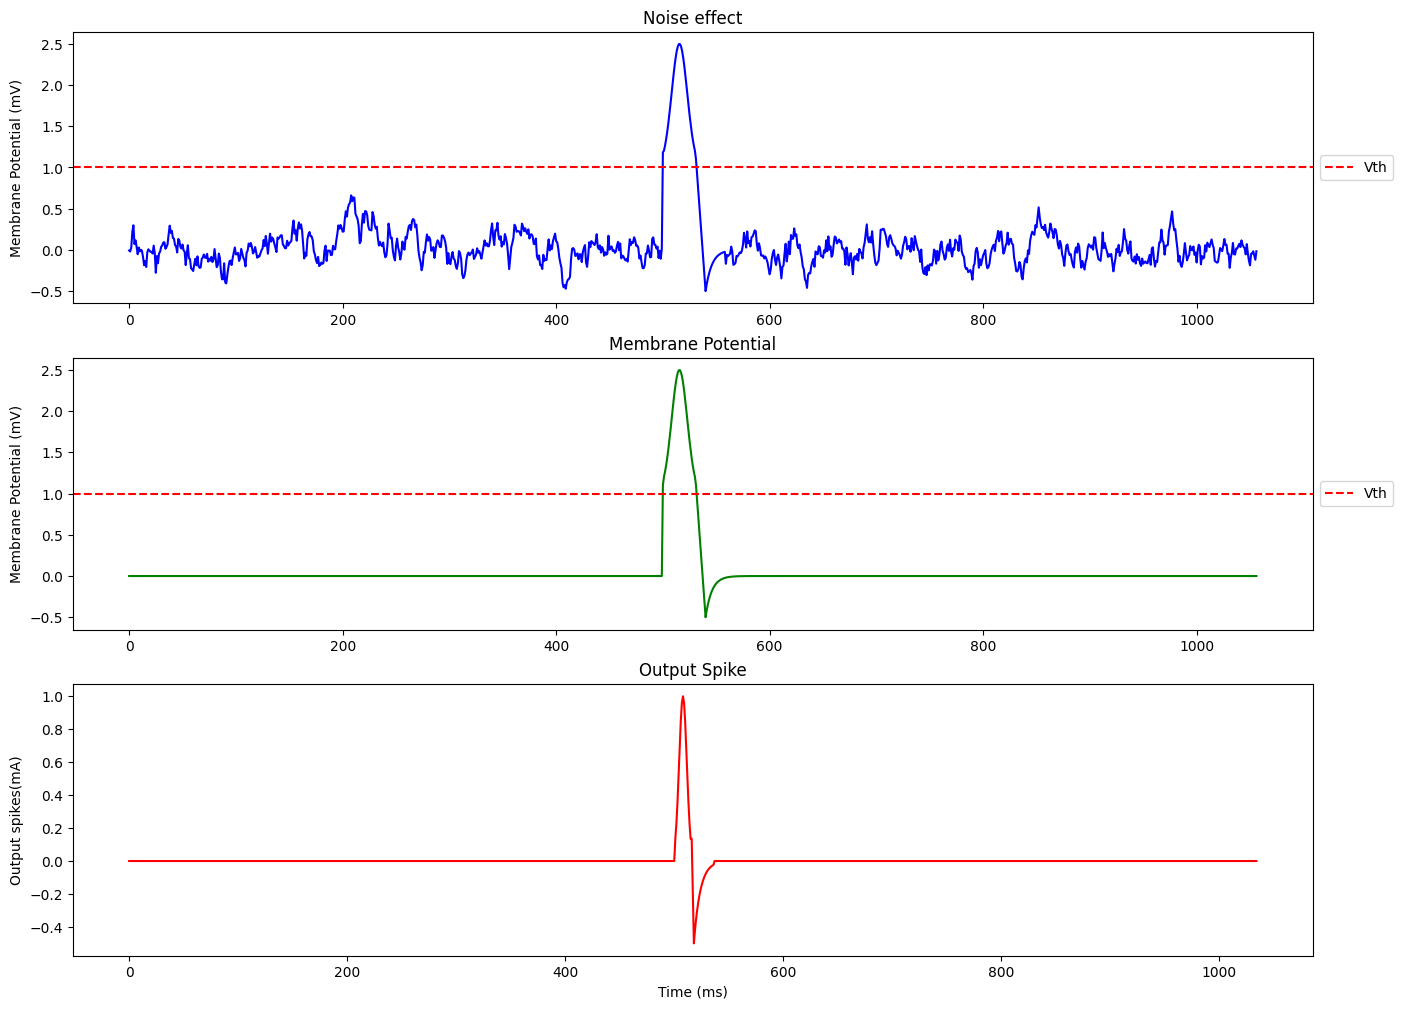

In [74]:
num_steps= 1000
mu, sigma = 0, 0.1
awgn_array = np.random.normal(mu, sigma, num_steps)
time_step = 0.787e-3
cur_in = np.zeros(num_steps)  # I=0 for all t
cur_in[500] = 1.4
mem=[0]
pot=[]
mem_arr=[0]
mem_rec=[]
spk_rec=[]
spk1_rec=[]
for step in range(num_steps):
    awgn= awgn_array[step]
    mem_arr,spk1= spk_with_threshold(mem_arr[len(mem_arr)-1]+awgn, I=cur_in[step], time_step=time_step, Vth=1)
    mem,spk=spk_with_threshold(mem[len(mem)-1],I=cur_in[step],time_step=time_step,Vth=1.0)
    pot=pot+mem
    spk_rec.append(spk)
    spk1_rec.append(spk1)
    mem_rec=mem_rec+mem_arr
mem_rec=np.array(mem_rec)
pot=np.array(pot)
spk_rec=np.array(spk_rec)
spk1_rec=np.array(spk1_rec)
spike=[]
for i in spk_rec:
    if(i==1):
        spike+=(generate_pulse())
    else:
        spike.append(0)
memplot_phases(mem_rec,pot,spike,'Noise effect')


# Modelling the spike transmission

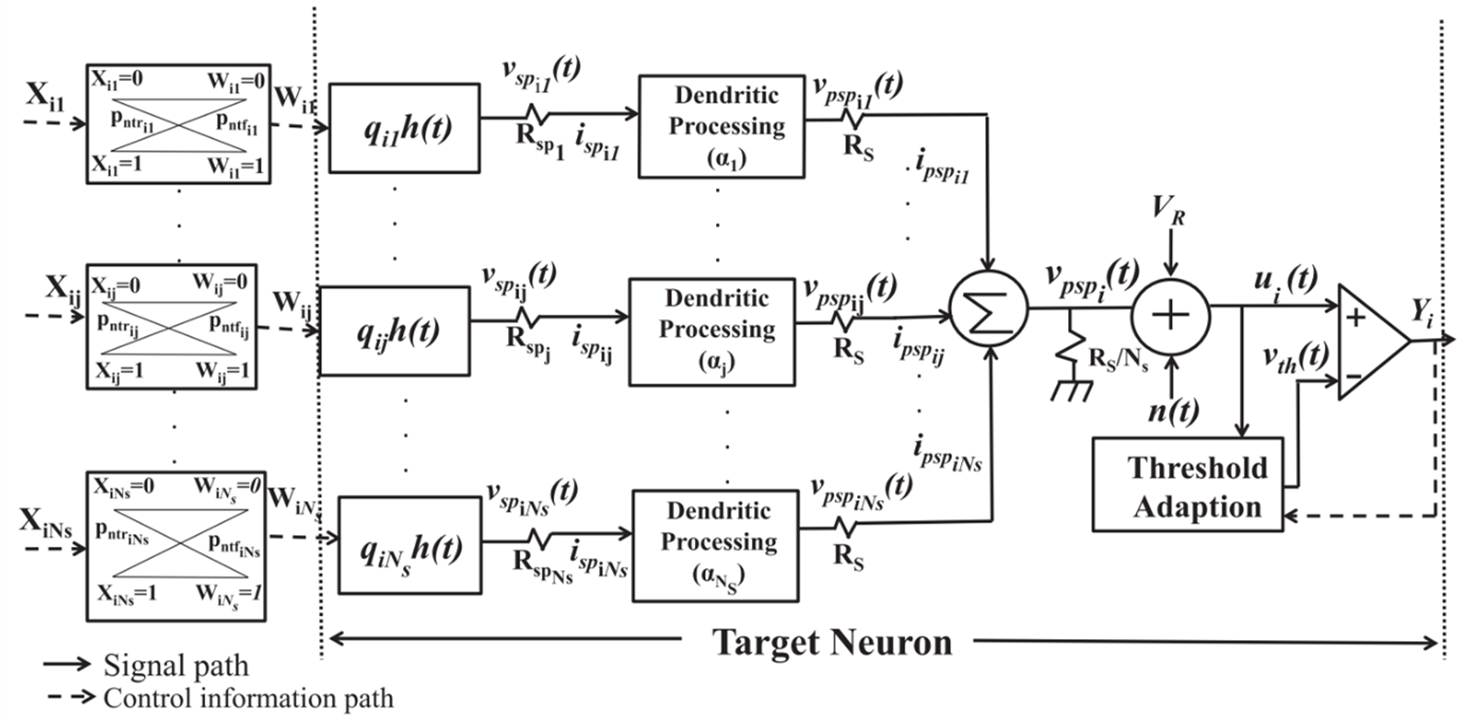

In [55]:
def spike_train(vol_in,q,r,rs):
    # Generate random weights with a probability of 50% for each element
    weight = np.random.choice([0, 1], size=len(vol_in), p=[0.5, 0.5])
    
    # Multiply vol_in with weight element-wise
    weighted_vol = vol_in * weight
    
    # Generate a random array Q with values ranging from 0.5 to 1
    Q = np.random.uniform(1.0,q, size=len(vol_in))
    
    # Multiply weighted_vol with Q element-wise to get vsp
    vsp = weighted_vol * Q
    
    # Generate a random array R 
    R = np.random.uniform(1, r, size=len(vol_in))
    
    # Divide vsp by R element-wise to get isp
    isp = vsp / R
    
    # Generate a random array alpha with the same length as vol_in
    alpha = np.random.uniform(0.7,0.9,size=len(vol_in))
    
    # Multiply alpha with isp to get vpsp
    vpsp = alpha * isp
    
    # Divide vpsp by the constant Rs = 1 to obtain ipsp
    Rs = rs
    ipsp = vpsp / Rs
    
    # Return the resulting synaptic current 
    return ipsp

# Create a random vol_in array with elements 1 and 0
# Probability of 1 is 80%






# Single neuron connection

Approximating one action potential as transmitting a spike of "magnitude" 1

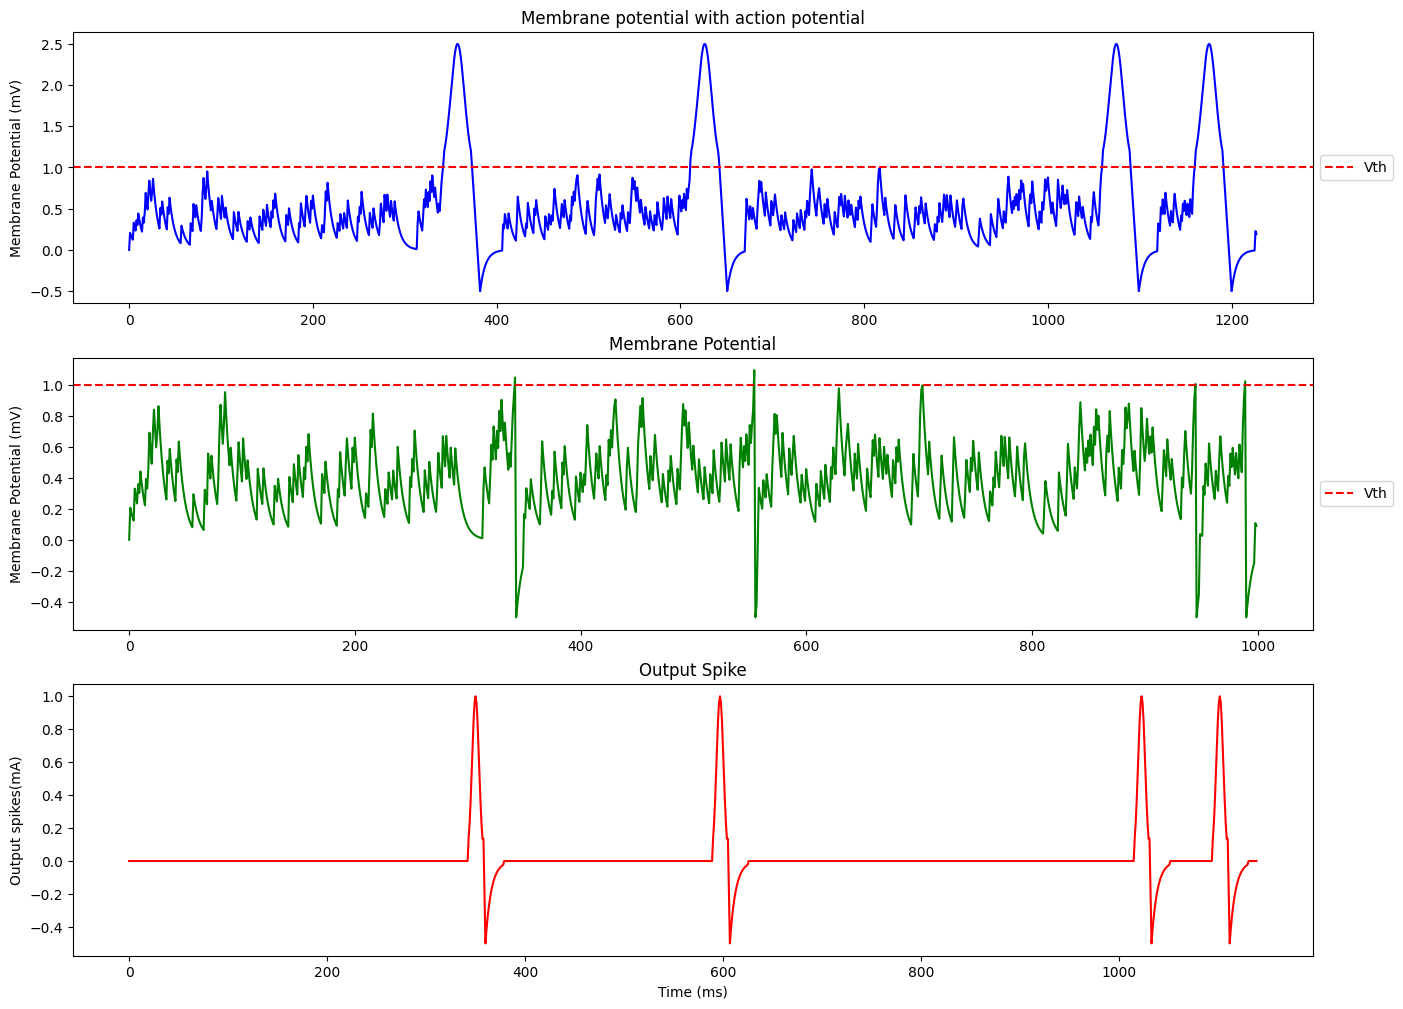

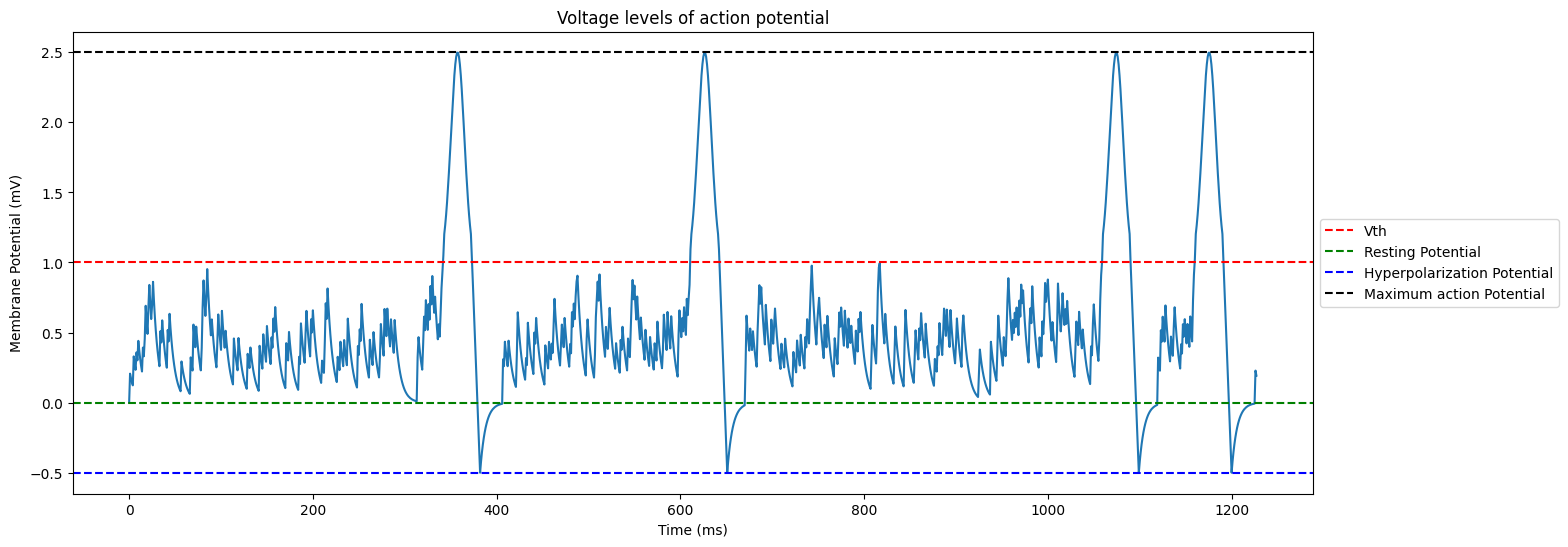

In [76]:
num_steps=1000
vol_in = np.random.choice([0, 1], size=num_steps, p=[0.5, 0.5])
cur_in=spike_train(vol_in,q=1.2,r=1.9,rs=1.95)
mem=0
pot=[]
mem_arr=[0]
mem_rec=[]
spk_rec=[]
for step in range(num_steps):
    mem_arr,spk1= spk_with_threshold(mem_arr[len(mem_arr)-1], I=cur_in[step], time_step=time_step, Vth=1.00)
    mem,spk=lif_with_threshold(mem,I=cur_in[step],time_step=time_step,Vth=1.0)
    pot.append(mem)
    spk_rec.append(spk)
    mem_rec=mem_rec+mem_arr
mem_rec=np.array(mem_rec)
spk_rec=np.array(spk_rec)
spike=[]
for i in spk_rec:
    if(i==1):
        spike+=(generate_pulse())
    else:
        spike.append(0)
max=(mem_rec.max())
if(max<2.5):
    max=2.5
    
memplot_phases(mem_rec,pot,spike,'Membrane potential with action potential')
memplot(mem_rec,max,'Voltage levels of action potential')


# Multiple upstream neurons(5)

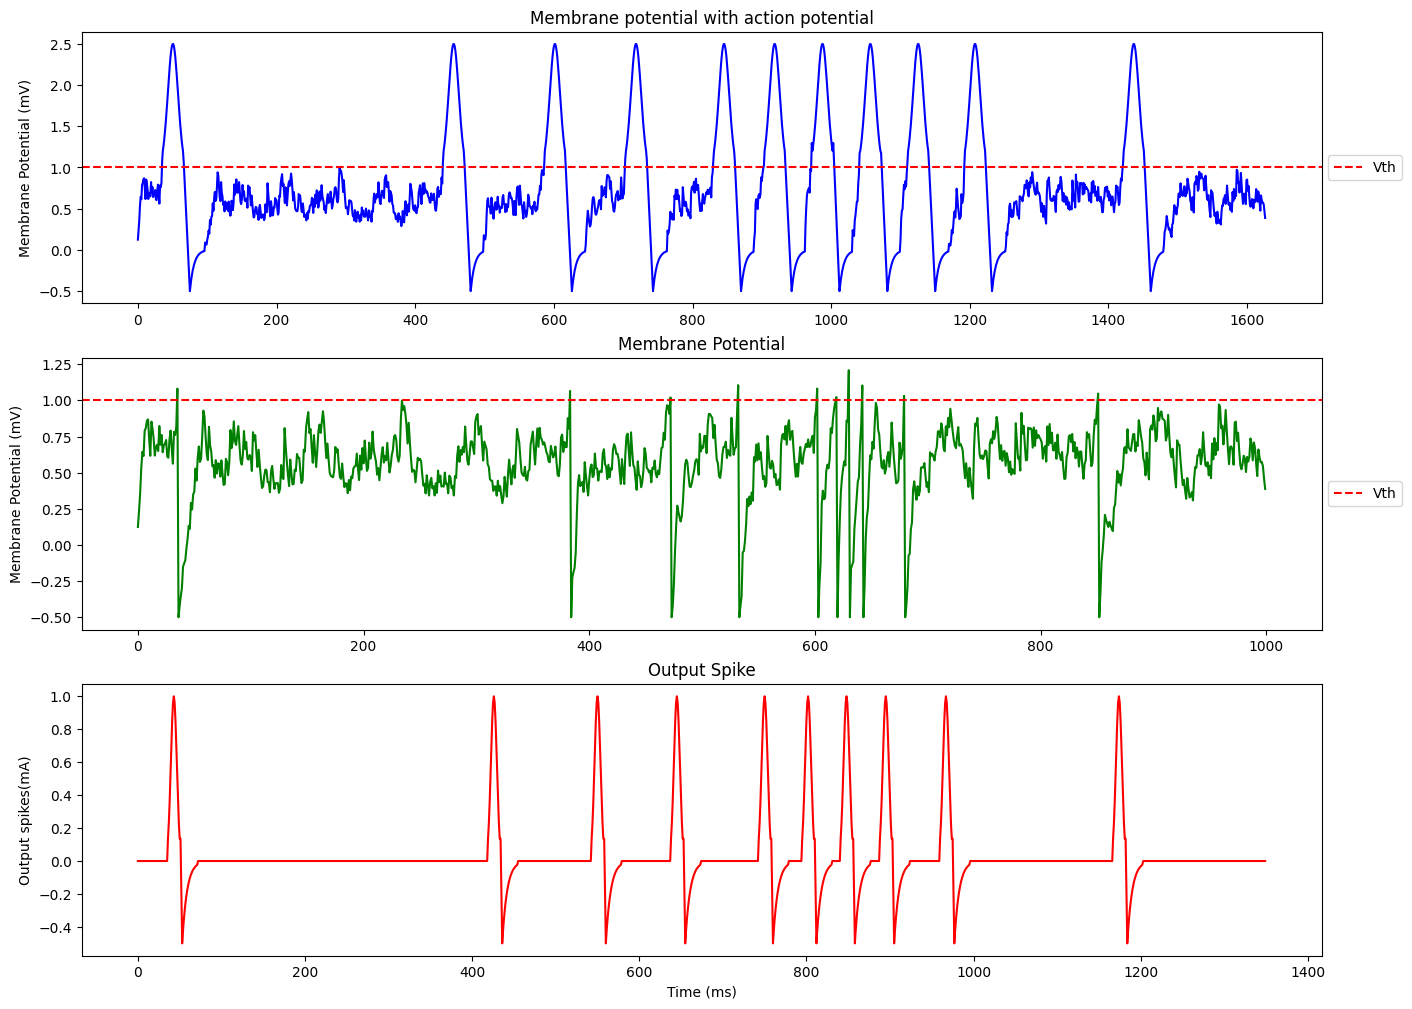

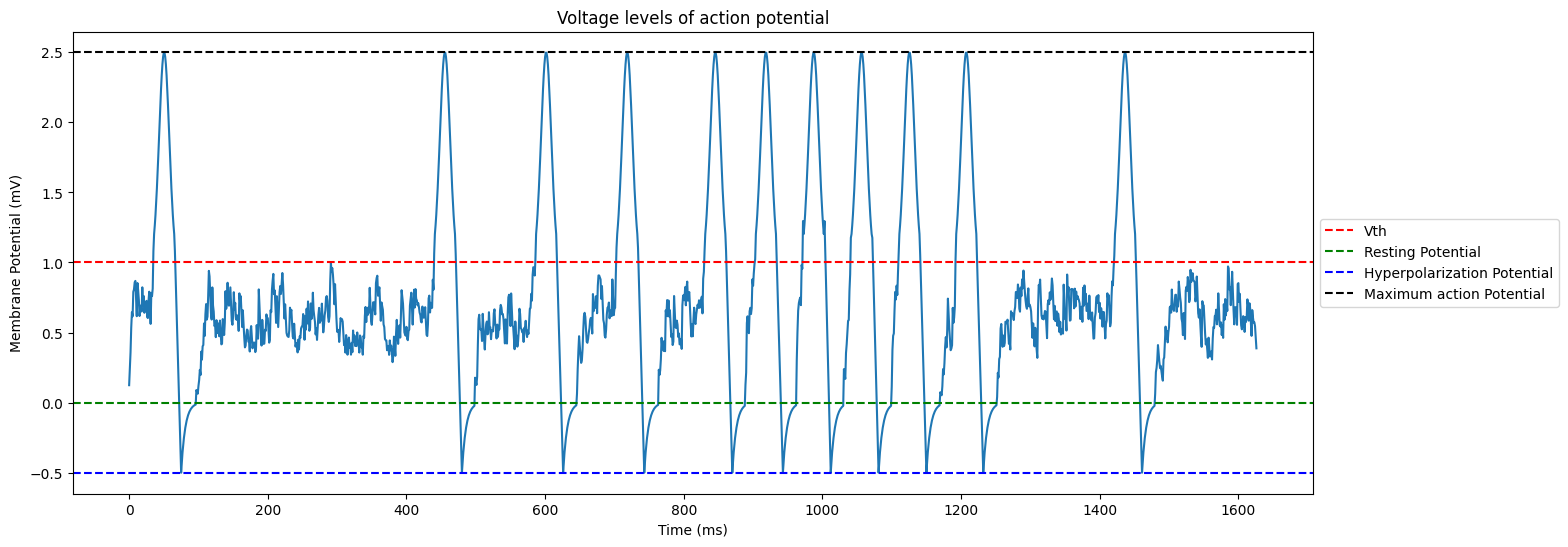

In [77]:
num_steps=1000
cur_in=np.zeros(num_steps)
for _ in range (5):

    vol_in = np.random.choice([0, 1], size=num_steps, p=[0.6, 0.4])
    cur_row=spike_train(vol_in,q=1.15,r=3.2,rs=3.5)
    cur_in+=cur_row

mem=0
pot=[]
mem_arr=[0]
mem_rec=[]
spk_rec=[]
for step in range(num_steps):
    mem_arr,spk1= spk_with_threshold(mem_arr[len(mem_arr)-1], I=cur_in[step], time_step=time_step, Vth=1.00)
    mem,spk=lif_with_threshold(mem,I=cur_in[step],time_step=time_step,Vth=1.0)
    pot.append(mem)
    spk_rec.append(spk)
    mem_rec=mem_rec+mem_arr
mem_rec=np.array(mem_rec)
spk_rec=np.array(spk_rec)
spike=[]
for i in spk_rec:
    if(i==1):
        spike+=(generate_pulse())
    else:
        spike.append(0)
max=(mem_rec.max())
if(max<2.5):
    max=2.5
    
memplot_phases(mem_rec,pot,spike,'Membrane potential with action potential')
memplot(mem_rec,max,'Voltage levels of action potential')

# Applying similar action potential to two upstream neurons

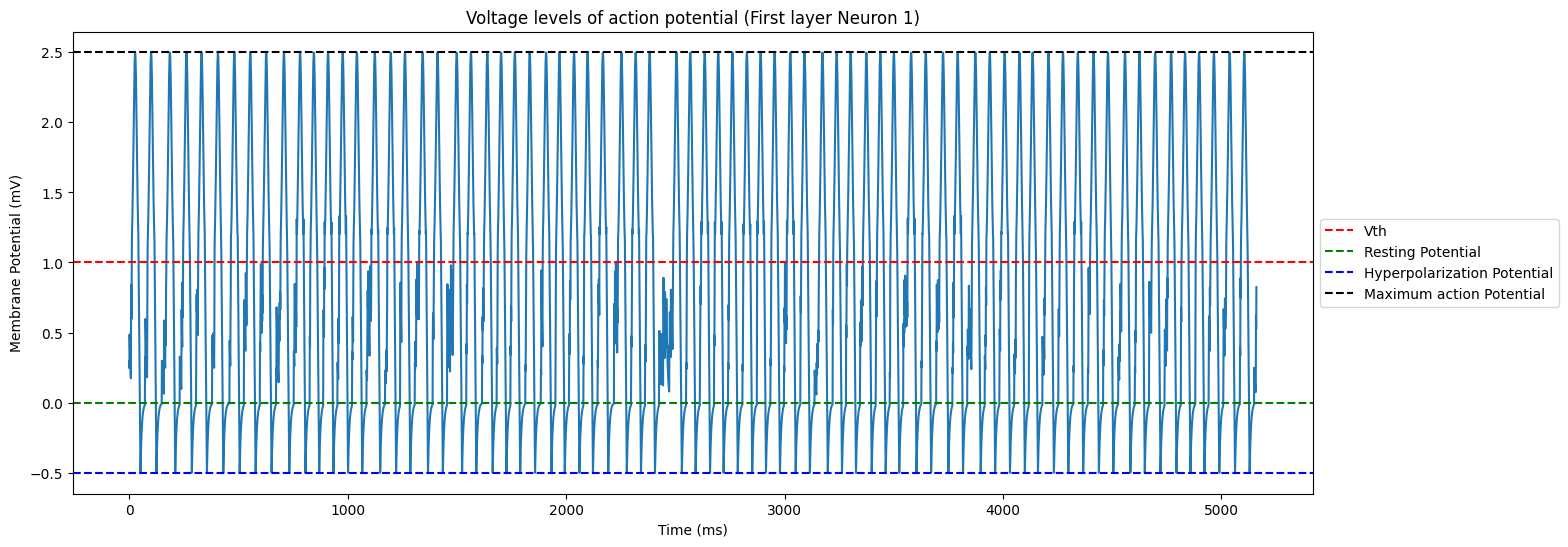

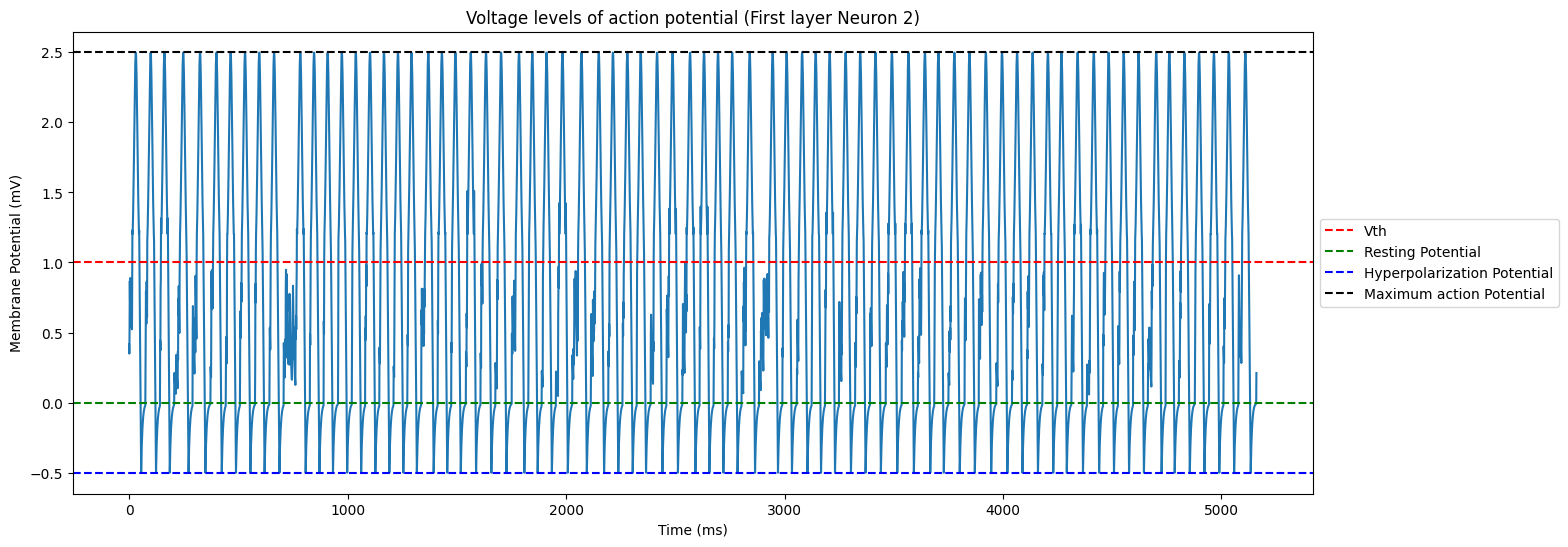

In [78]:
num_steps=1000
cur_in=np.zeros(num_steps)
cur_rows=[]
spk_next=[]
vol_in = np.random.choice([0, 1], size=num_steps, p=[0.2, 0.8])
for _ in range (2):
    cur_row=spike_train(vol_in,q=1.15,r=3.2,rs=0.9)
    cur_rows.append(cur_row)
for _ in range(2):
    cur_in=cur_rows[_]
    mem = 0
    pot = []
    mem_arr = [0]
    mem_rec = []
    spk_rec = []
    for step in range(num_steps):
        mem_arr, spk1 = spk_with_threshold(mem_arr[len(mem_arr) - 1], I=cur_in[step], time_step=time_step, Vth=1.00)
        mem, spk = lif_with_threshold(mem, I=cur_in[step], time_step=time_step, Vth=1.0)
        pot.append(mem)
        spk_rec.append(spk)
        mem_rec = mem_rec + mem_arr
    
    spike = []
    for i in spk_rec:
        if i == 1:
            spike += (generate_pulse())
        else:
            spike.append(0)
    mem_rec = np.array(mem_rec)
    max_val = mem_rec.max()
    if max_val < 2.5:
        max_val = 2.5
    spk_next.append(spk_rec)
    
    spk_rec = np.array(spk_rec)
    #memplot_phases(mem_rec, pot, spike, f'Membrane potential with action potential (First layer Neuron {_ + 1})')
    memplot(mem_rec, max_val, f'Voltage levels of action potential (First layer Neuron {_ + 1})')


# Transfer of spikes between layers

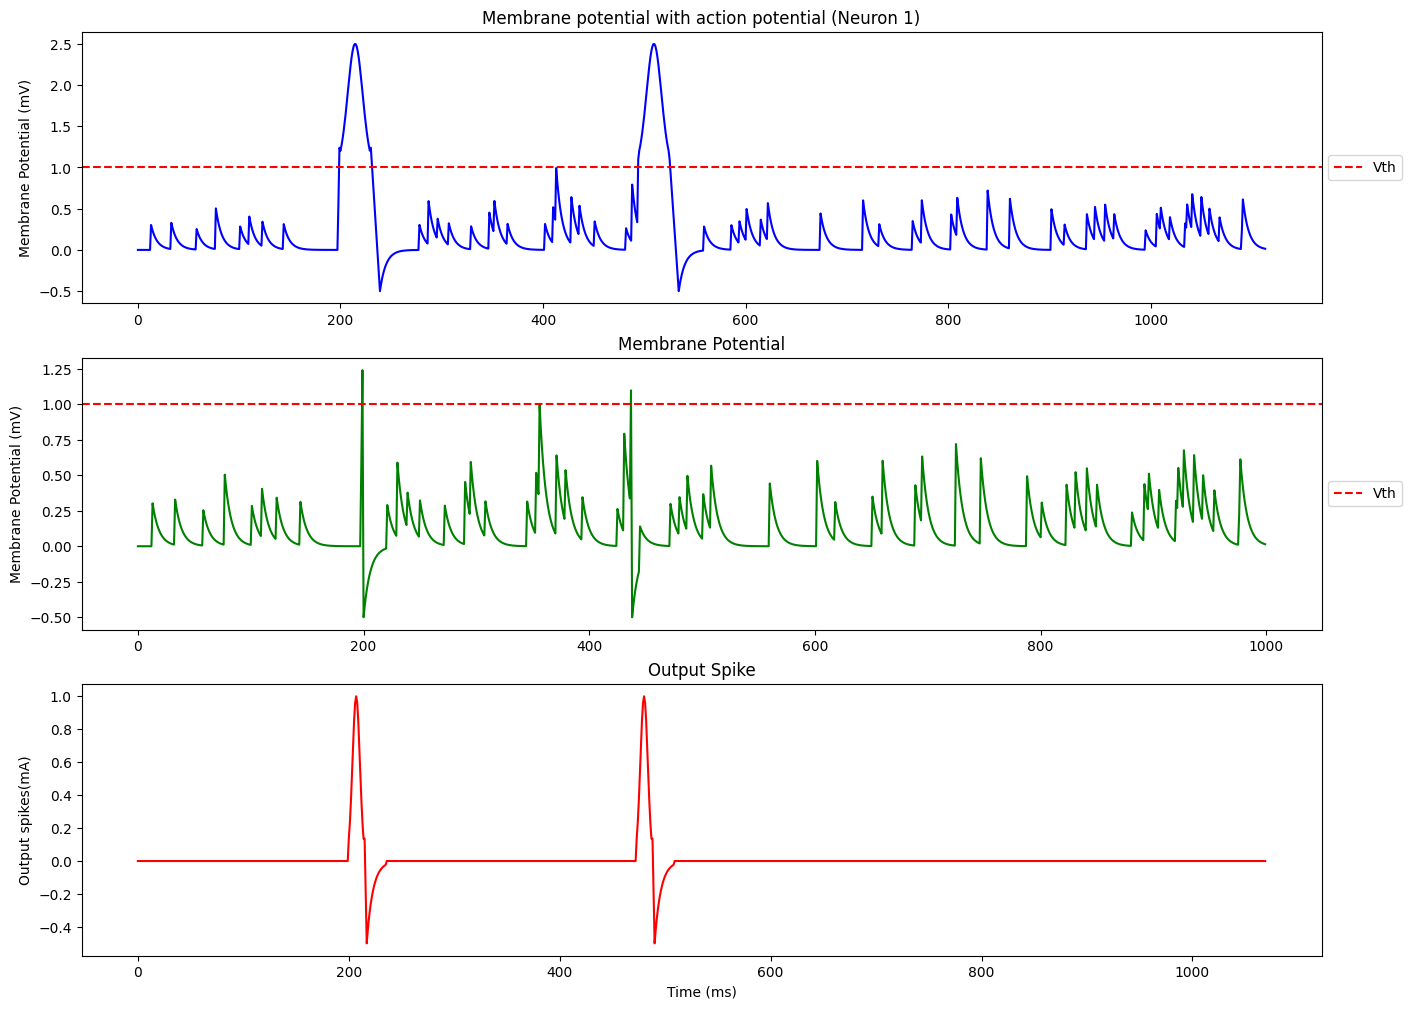

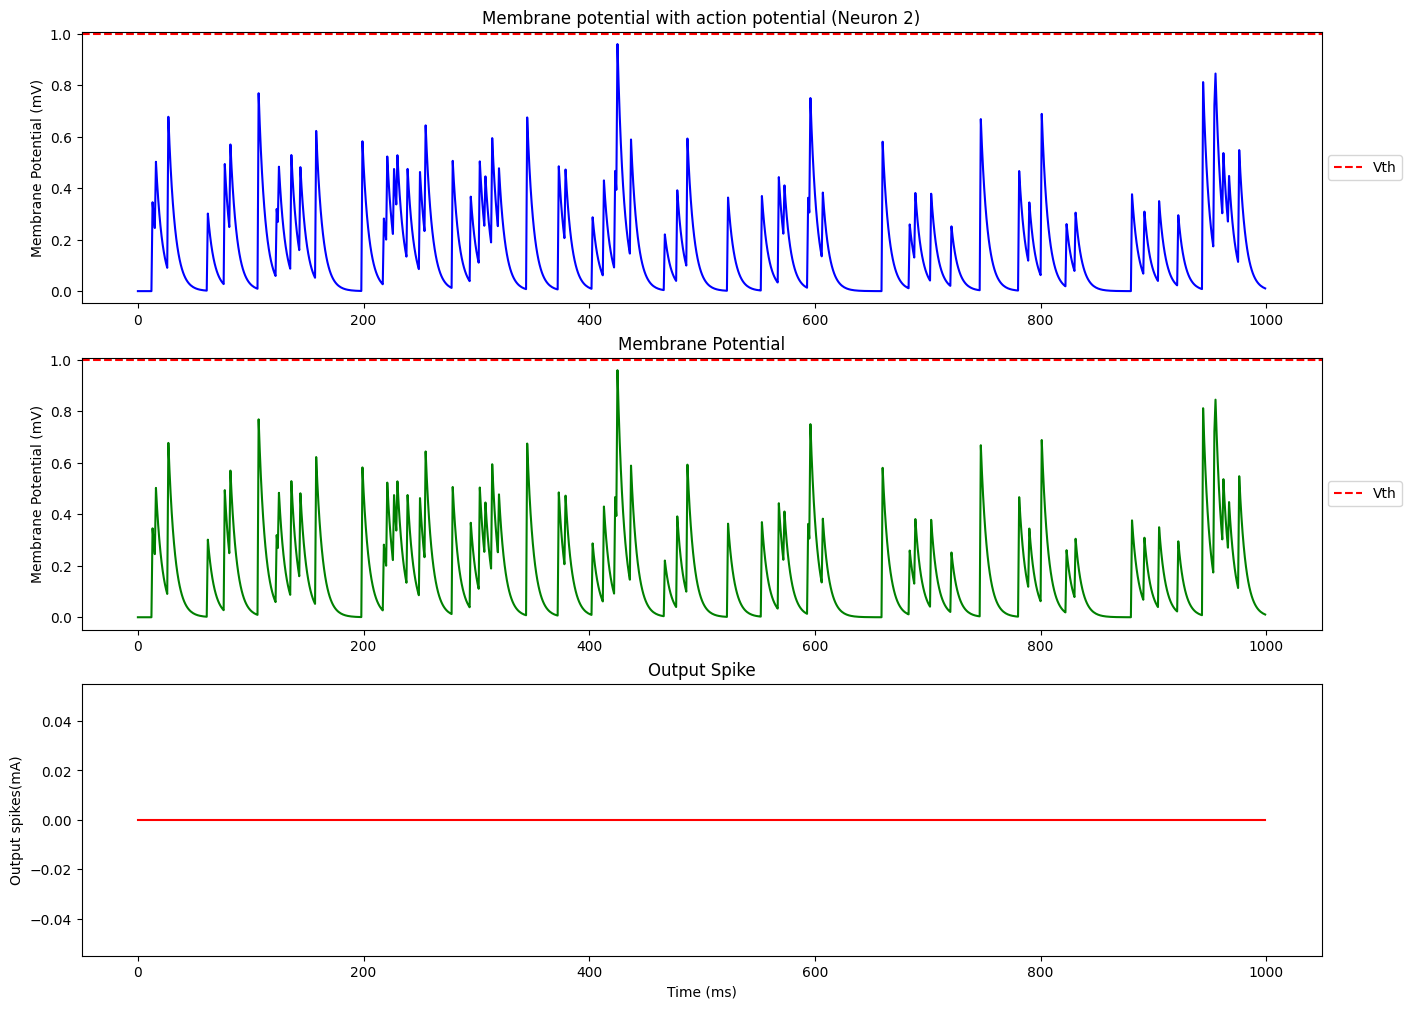

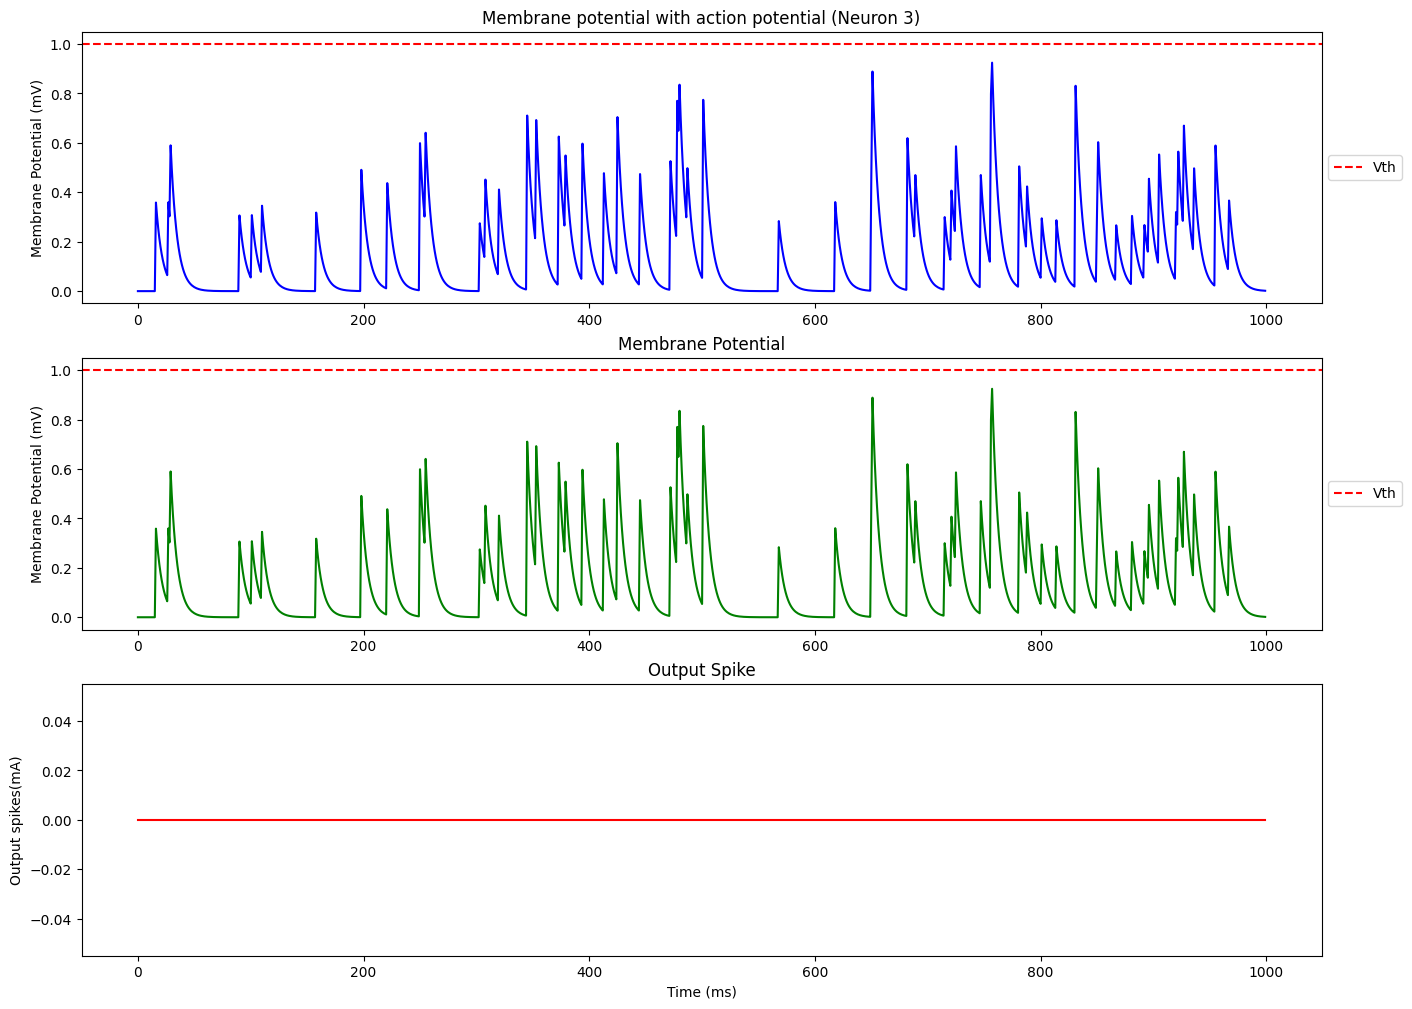

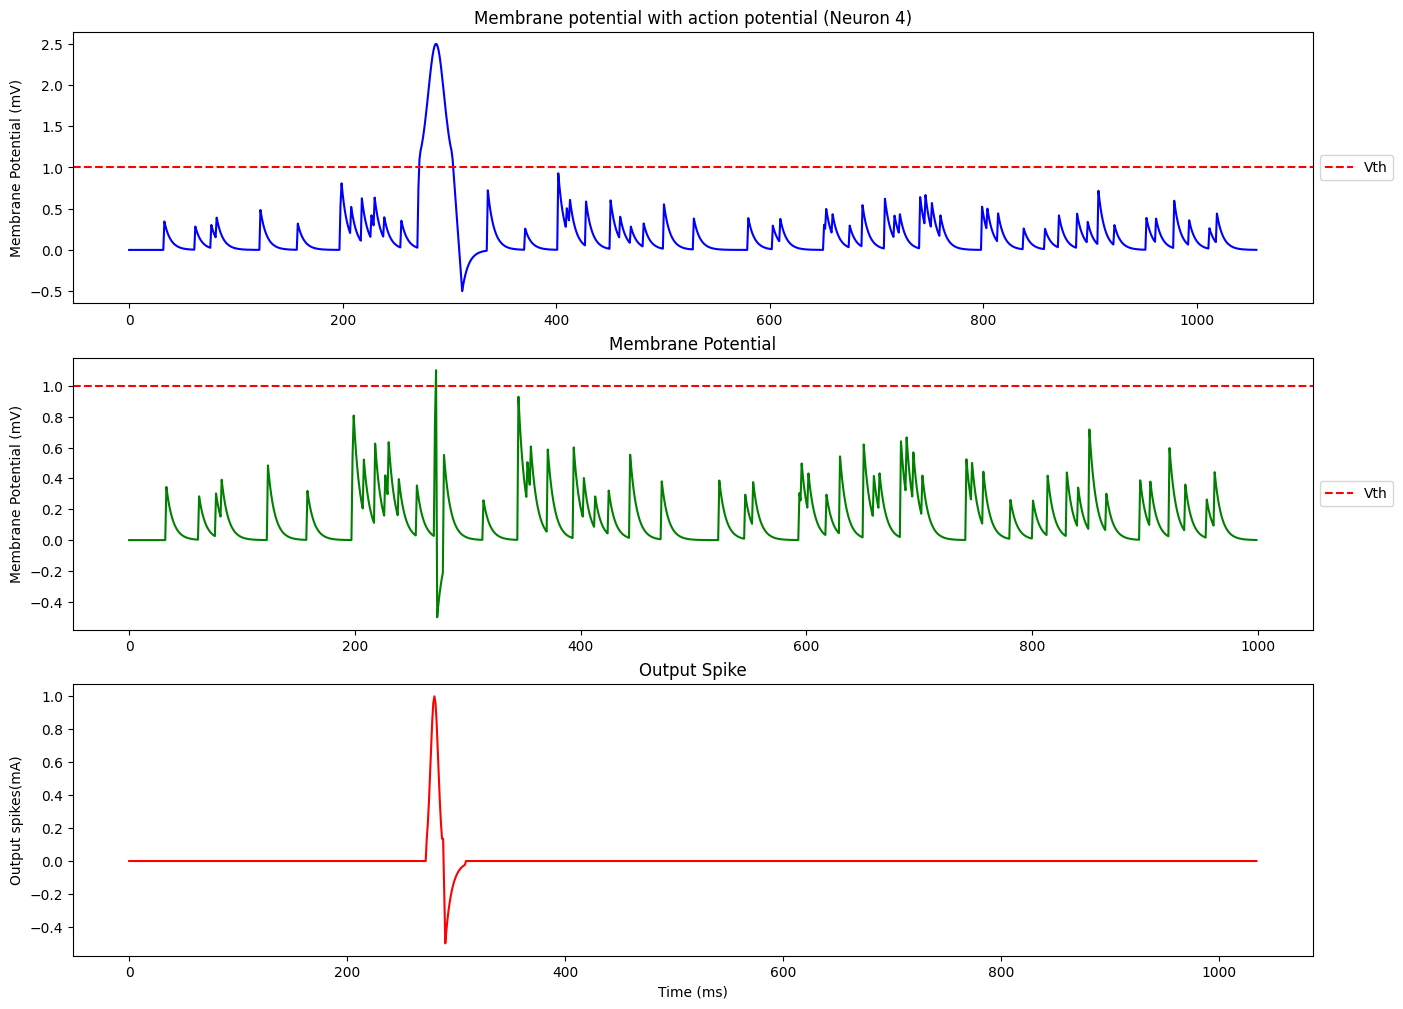

In [79]:
spk_copy=spk_next
num_steps = 1000
spk_next=[]
for _ in range(4):
    
    cur_in = np.zeros(num_steps)

    for vol_in in spk_copy:
        cur_row=spike_train(vol_in,q=1.15,r=3.2,rs=0.9)
        cur_in+=cur_row
    mem = 0
    pot = []
    mem_arr = [0]
    mem_rec = []
    spk_rec = []
    for step in range(num_steps):
        mem_arr, spk1 = spk_with_threshold(mem_arr[len(mem_arr) - 1], I=cur_in[step], time_step=time_step, Vth=1.00)
        mem, spk = lif_with_threshold(mem, I=cur_in[step], time_step=time_step, Vth=1.0)
        pot.append(mem)
        spk_rec.append(spk)
        mem_rec = mem_rec + mem_arr
    
    spike = []
    for i in spk_rec:
        if i == 1:
            spike += (generate_pulse())
        else:
            spike.append(0)
    mem_rec = np.array(mem_rec)
    max_val = mem_rec.max()
    if max_val < 2.5:
        max_val = 2.5
    spk_next.append(spk_rec)
    spk_rec = np.array(spk_rec)
    memplot_phases(mem_rec, pot, spike, f'Membrane potential with action potential (Neuron {_ + 1})')

# Creating a 3 layer ffw SNN

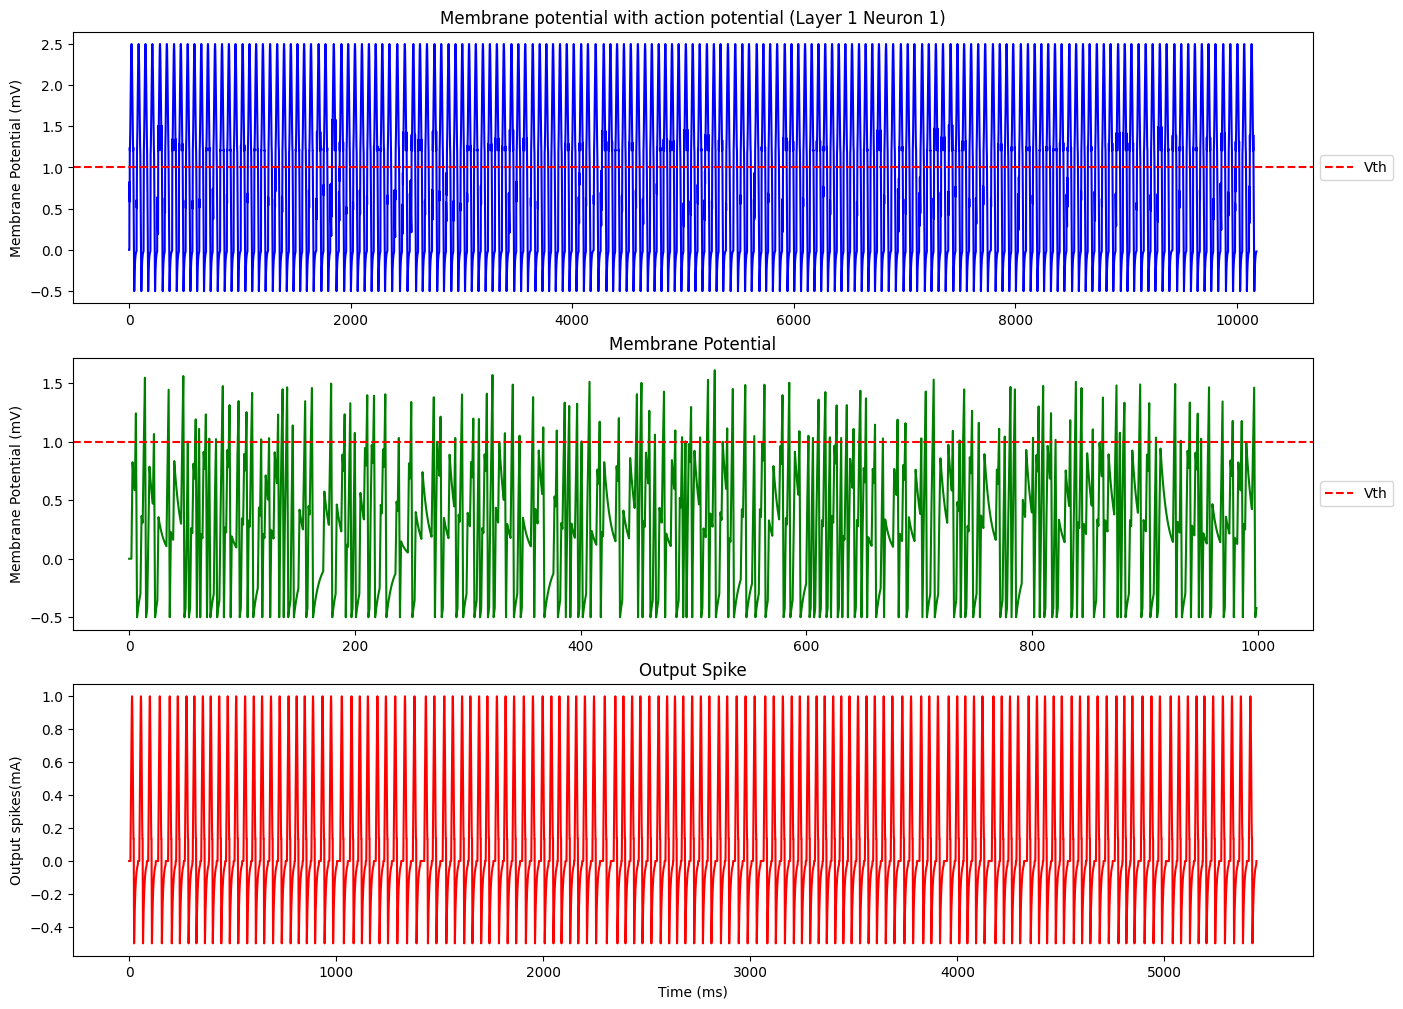

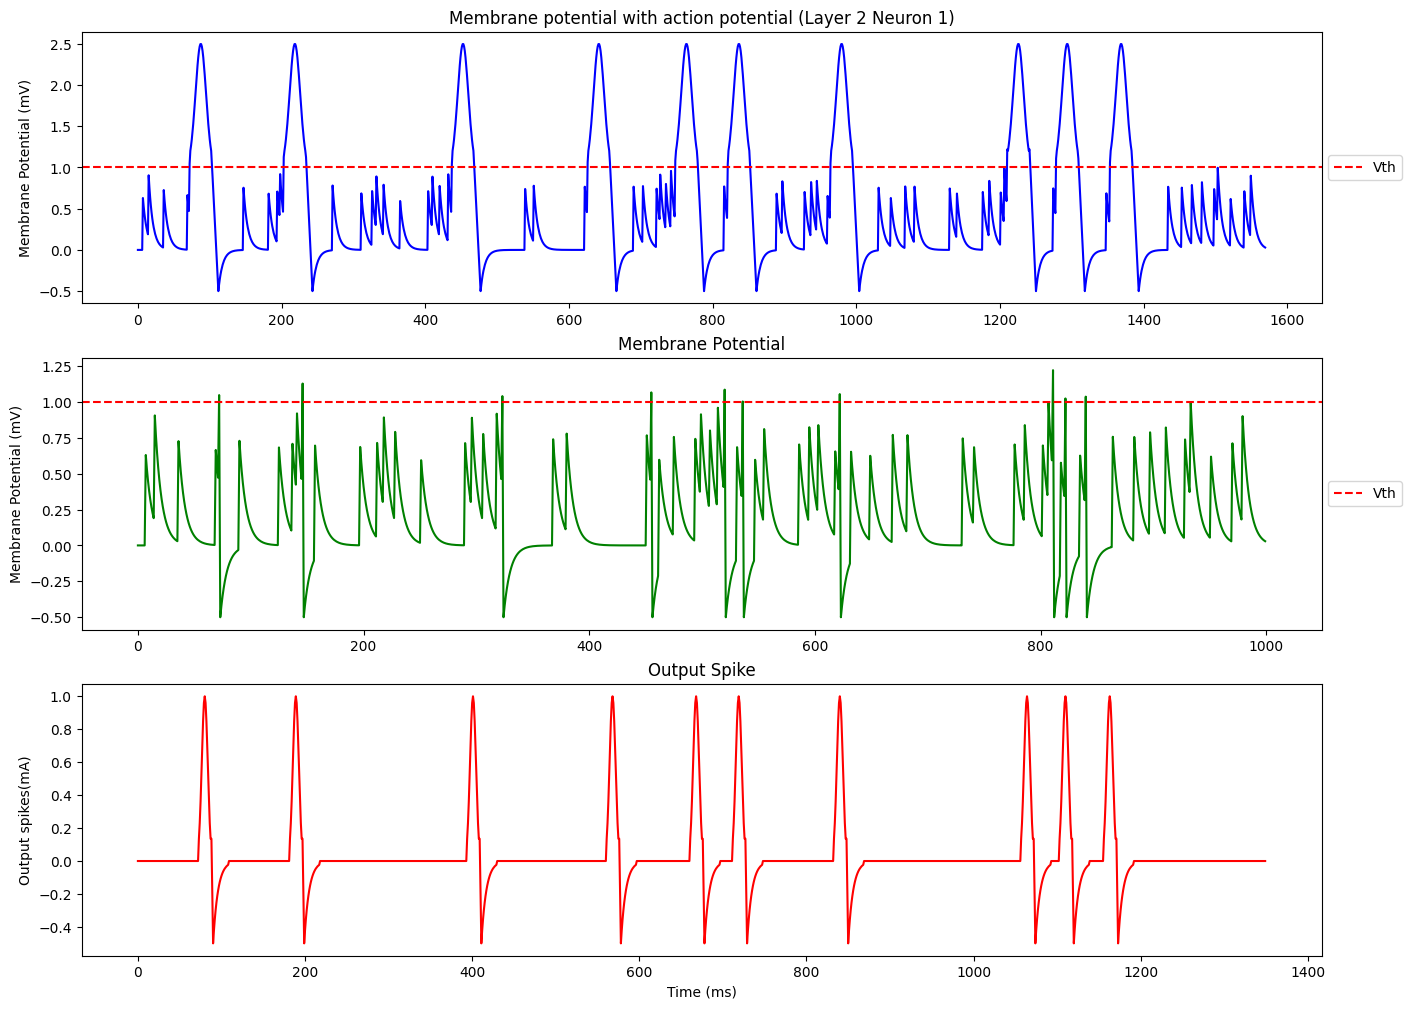

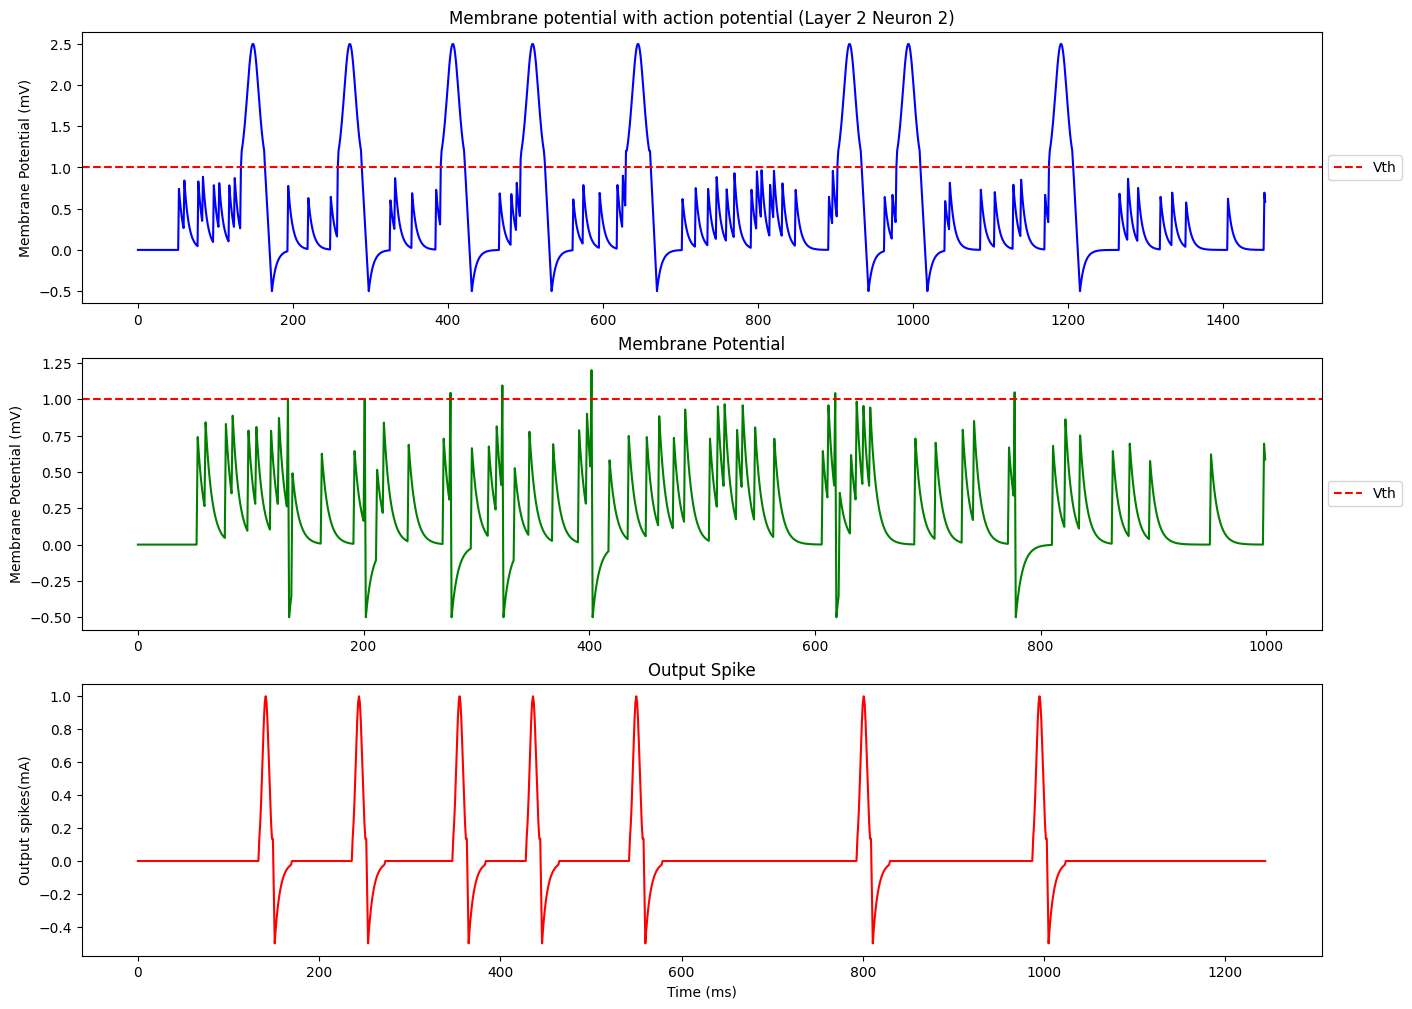

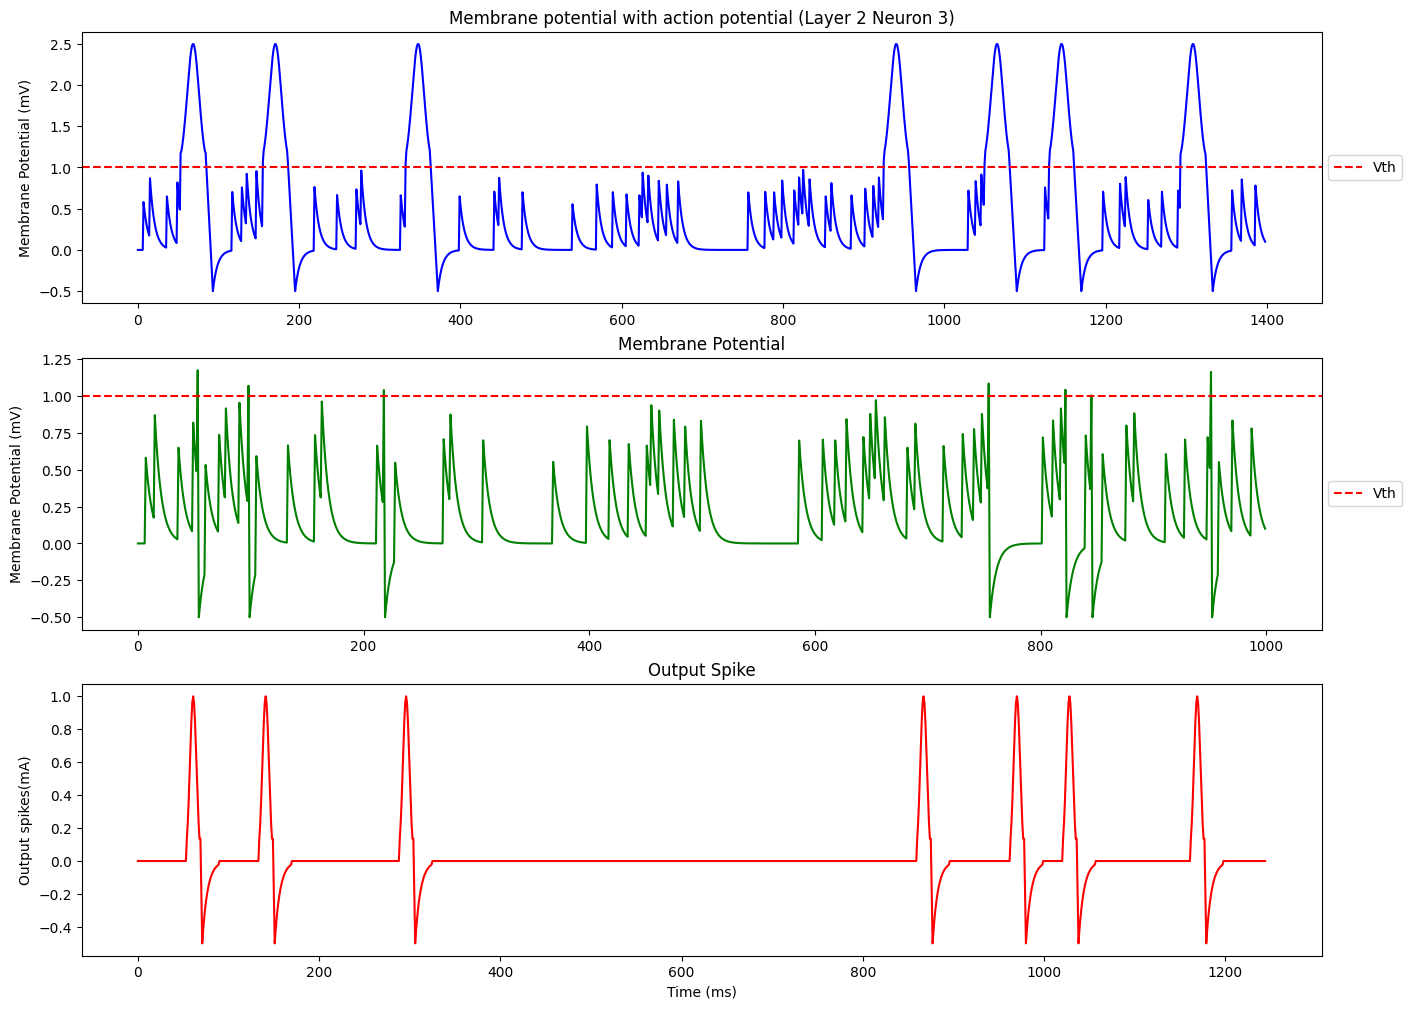

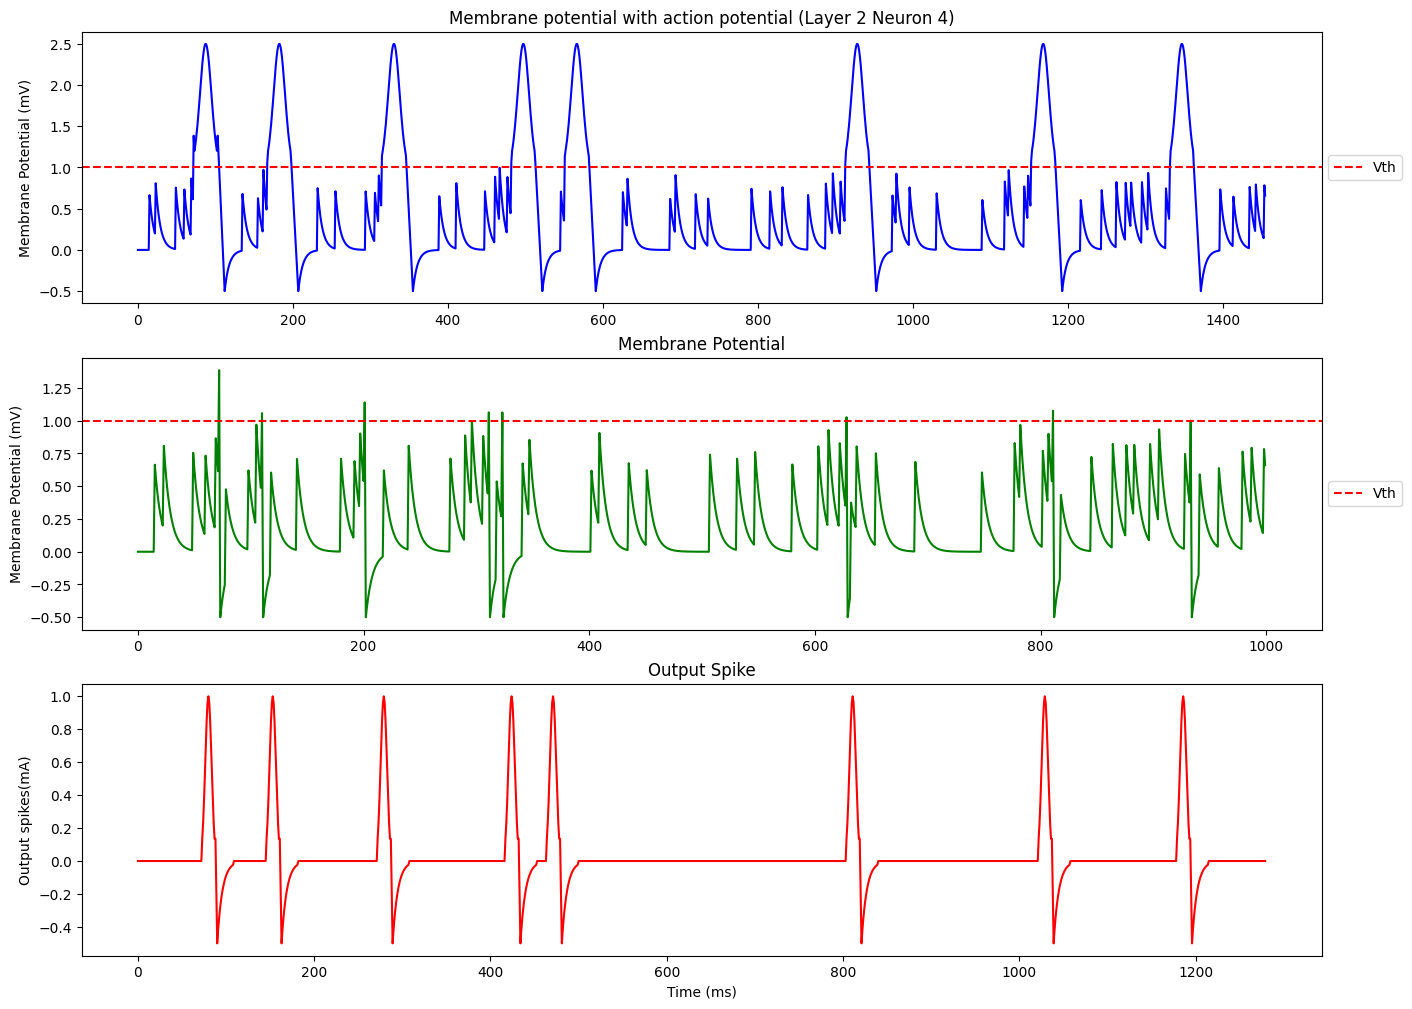

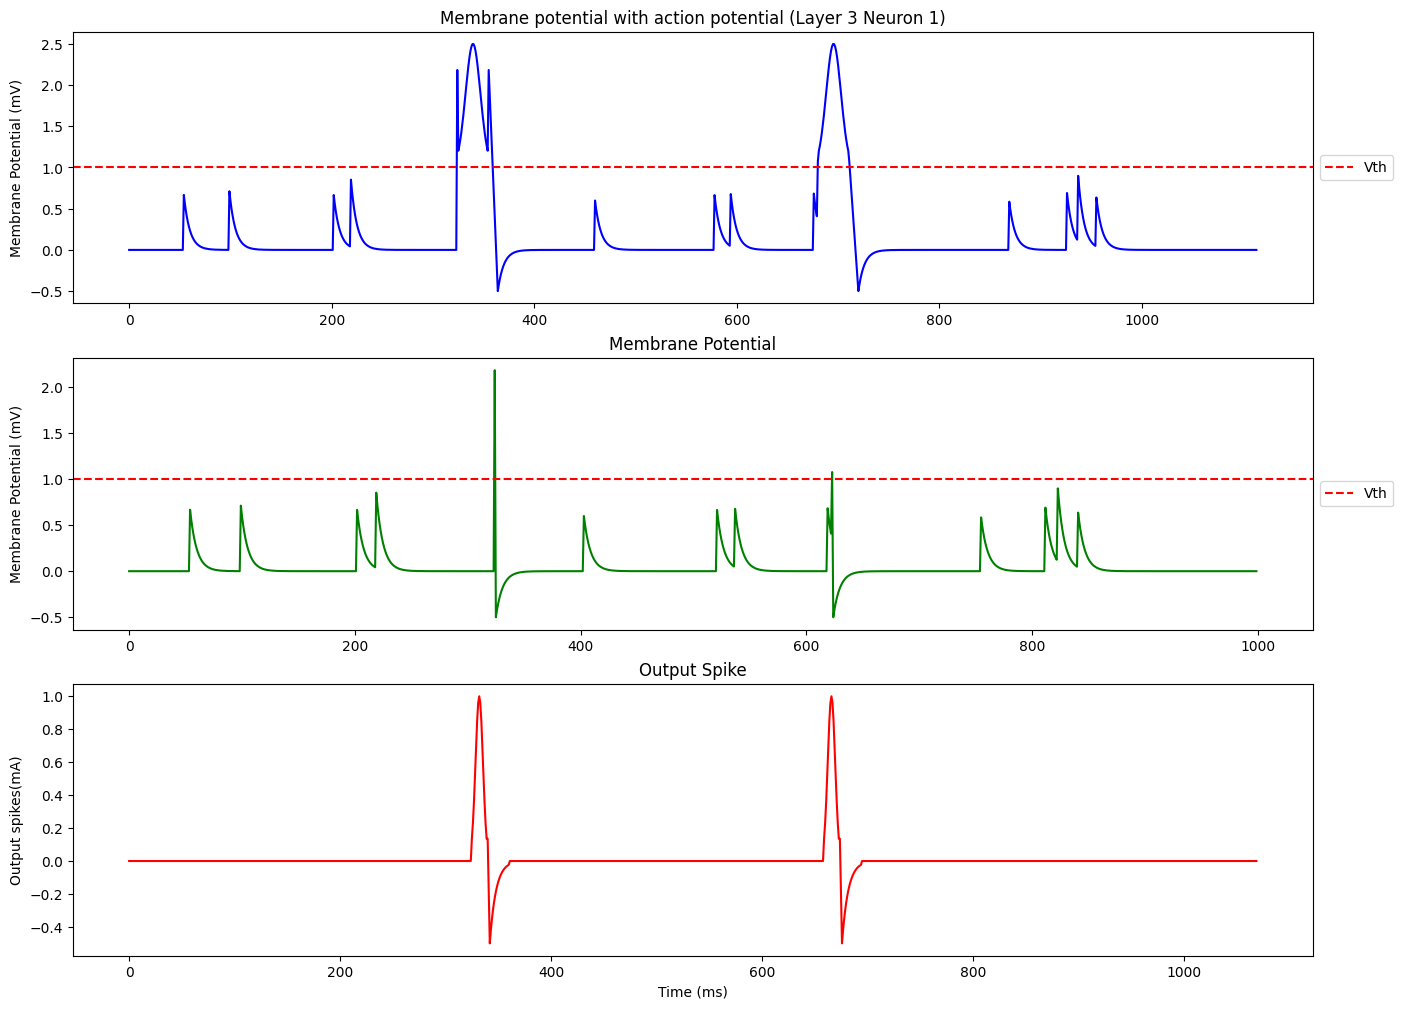

In [80]:
potin=np.random.choice([0, 1], size=num_steps, p=[0.2, 0.8])
spk_next=[]
spk_next.append(potin)
no=[1,4,1]
c=0
for x in no:
    spk_copy = spk_next
    num_steps = 1000
    spk_next = []
    c+=1
    for _ in range(x):
        cur_in = np.zeros(num_steps)

        for vol_in in spk_copy:
            cur_row = spike_train(vol_in, q=1.15, r=1.2, rs=0.9)
            cur_in += cur_row
        
        mem = 0
        pot = []
        mem_arr = [0]
        mem_rec = []
        spk_rec = []

        for step in range(num_steps):
            mem_arr, spk1 = spk_with_threshold(mem_arr[len(mem_arr) - 1], I=cur_in[step], time_step=time_step, Vth=1.00)
            mem, spk = lif_with_threshold(mem, I=cur_in[step], time_step=time_step, Vth=1.0)
            pot.append(mem)
            spk_rec.append(spk)
            mem_rec = mem_rec + mem_arr

        spike = []
        for i in spk_rec:
            if i == 1:
                spike += generate_pulse()
            else:
                spike.append(0)
        
        mem_rec = np.array(mem_rec)
        max_val = mem_rec.max()
        if max_val < 2.5:
            max_val = 2.5
        
        spk_next.append(spk_rec)
        spk_rec = np.array(spk_rec)
        memplot_phases(mem_rec, pot, spike, f'Membrane potential with action potential (Layer {c} Neuron {_ + 1})')


# Plotting the spiking patterns of a feed forward SNN with multiple user defined layers

In [149]:
def simulate_neurons(potin, no):
    spk_next = []
    spk_next.append(potin)
    c=0
    for x in no:
        spk_copy = spk_next
        num_steps = 1000
        spk_next = []
        c+=1
        for _ in range(x):
            cur_in = np.zeros(num_steps)

            for vol_in in spk_copy:
                cur_row = spike_train(vol_in, q=1.15, r=2.2, rs=0.9)
                cur_in += cur_row
            
            mem = 0
            pot = []
            mem_arr = [0]
            mem_rec = []
            spk_rec = []

            for step in range(num_steps):
                mem_arr, spk1 = spk_with_threshold(mem_arr[len(mem_arr) - 1], I=cur_in[step], time_step=time_step, Vth=1.00)
                mem, spk = lif_with_threshold(mem, I=cur_in[step], time_step=time_step, Vth=1.0)
                pot.append(mem)
                spk_rec.append(spk)
                mem_rec = mem_rec + mem_arr

            spike = []
            for i in spk_rec:
                if i == 1:
                    spike += generate_pulse()
                else:
                    spike.append(0)
            
            mem_rec = np.array(mem_rec)
            max_val = mem_rec.max()
            if max_val < 2.5:
                max_val = 2.5
            
            spk_next.append(spk_rec)
            spk_rec = np.array(spk_rec)
            memplot_phases(mem_rec, pot, spike, f'Membrane potential with action potential (Layer{c} Neuron{_ + 1})')
def spk_neurons(potin, no):
    spk_next = []
    spk_next.append(potin)
    spk_arr = []  # Initialize the spk_arr

    for x in no:
        spk_copy = spk_next
        num_steps = 1000
        spk_next = []
        layer_spk_rec = []  # Initialize the spk_rec for the current layer

        for _ in range(x):
            cur_in = np.zeros(num_steps)

            for vol_in in spk_copy:
                cur_row = spike_train(vol_in, q=1.15, r=2.2, rs=0.9)
                cur_in += cur_row
            
            mem = 0
            pot = []
            mem_arr = [0]
            mem_rec = []
            spk_rec = []

            for step in range(num_steps):
                mem_arr, spk1 = spk_with_threshold(mem_arr[len(mem_arr) - 1], I=cur_in[step], time_step=time_step, Vth=1.00)
                mem, spk = lif_with_threshold(mem, I=cur_in[step], time_step=time_step, Vth=1.0)
                pot.append(mem)
                spk_rec.append(spk)
                mem_rec = mem_rec + mem_arr

            spike = []
            for i in spk_rec:
                if i == 1:
                    spike += generate_pulse()
                else:
                    spike.append(0)
            
            mem_rec = np.array(mem_rec)
            max_val = mem_rec.max()
            if max_val < 2.5:
                max_val = 2.5
            
            spk_next.append(spk_rec)
            spk_rec = np.array(spk_rec)
            #memplot_phases(mem_rec, pot, spike, f'Membrane potential with action potential (Neuron {_ + 1})')
            
            # Append the spk_rec for the current neuron to the layer_spk_rec
            layer_spk_rec.append(spk_rec)
        
        # Append the spk_rec for the current layer to the spk_arr
        spk_arr.append(layer_spk_rec)

    return spk_arr
def display_total_spikes(spk, no):
    for i, num_neurons in enumerate(no):
        layer_spk_rec = spk[i]  # Get the spike records for the current layer

        print(f"Layer {i + 1}:")
        for j, neuron_spikes in enumerate(layer_spk_rec):
            total_spikes_neuron = sum(neuron_spikes)  # Calculate the total number of spikes for the current neuron
            print(f"  Neuron {j + 1}: {total_spikes_neuron} spikes")
def stem_plot_layer_spikes(spk, layer_no):
    if layer_no < 1 or layer_no > len(spk):
        print("Invalid layer number.")
        return

    layer_spikes = spk[layer_no - 1]
    num_neurons = len(layer_spikes)

    plt.figure(figsize=(12, 2 * num_neurons))
    plt.suptitle(f"Layer {layer_no} - Neuron Spikes ", fontsize=16)

    for i, neuron_spikes in enumerate(layer_spikes, start=1):
        spike_indices = [idx for idx, spike in enumerate(neuron_spikes) if spike == 1]
        spike_times = [idx for idx in spike_indices]
        plt.subplots_adjust(hspace=1.0)
        plt.subplot(num_neurons, 1, i)
        plt.stem(spike_times, [1] * len(spike_indices), linefmt='C0-', basefmt=" ", markerfmt='C0o', use_line_collection=True)
        plt.title(f"Neuron {i}",fontsize=10)
        plt.xlabel("Spike affected time interval")
        plt.ylabel("Spike")

    #plt.tight_layout()
    plt.show()

# Example usage:



In [137]:
potin = np.random.choice([0, 1], size=num_steps, p=[0.2, 0.8])
no = [2,30,5,1]
#simulate_neurons(potin, no)
spk=spk_neurons(potin,no)
display_total_spikes(spk,no)

Layer 1:
  Neuron 1: 82 spikes
  Neuron 2: 88 spikes
Layer 2:
  Neuron 1: 3 spikes
  Neuron 2: 9 spikes
  Neuron 3: 3 spikes
  Neuron 4: 7 spikes
  Neuron 5: 5 spikes
  Neuron 6: 3 spikes
  Neuron 7: 4 spikes
  Neuron 8: 6 spikes
  Neuron 9: 7 spikes
  Neuron 10: 6 spikes
  Neuron 11: 3 spikes
  Neuron 12: 4 spikes
  Neuron 13: 6 spikes
  Neuron 14: 11 spikes
  Neuron 15: 2 spikes
  Neuron 16: 6 spikes
  Neuron 17: 3 spikes
  Neuron 18: 3 spikes
  Neuron 19: 4 spikes
  Neuron 20: 7 spikes
  Neuron 21: 4 spikes
  Neuron 22: 6 spikes
  Neuron 23: 9 spikes
  Neuron 24: 6 spikes
  Neuron 25: 2 spikes
  Neuron 26: 5 spikes
  Neuron 27: 6 spikes
  Neuron 28: 5 spikes
  Neuron 29: 6 spikes
  Neuron 30: 8 spikes
Layer 3:
  Neuron 1: 15 spikes
  Neuron 2: 16 spikes
  Neuron 3: 15 spikes
  Neuron 4: 11 spikes
  Neuron 5: 13 spikes
Layer 4:
  Neuron 1: 6 spikes


C:\Users\abgho\AppData\Local\Temp\ipykernel_9852\1364333792.py:123: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(spike_times, [1] * len(spike_indices), linefmt='C0-', basefmt=" ", markerfmt='C0o', use_line_collection=True)


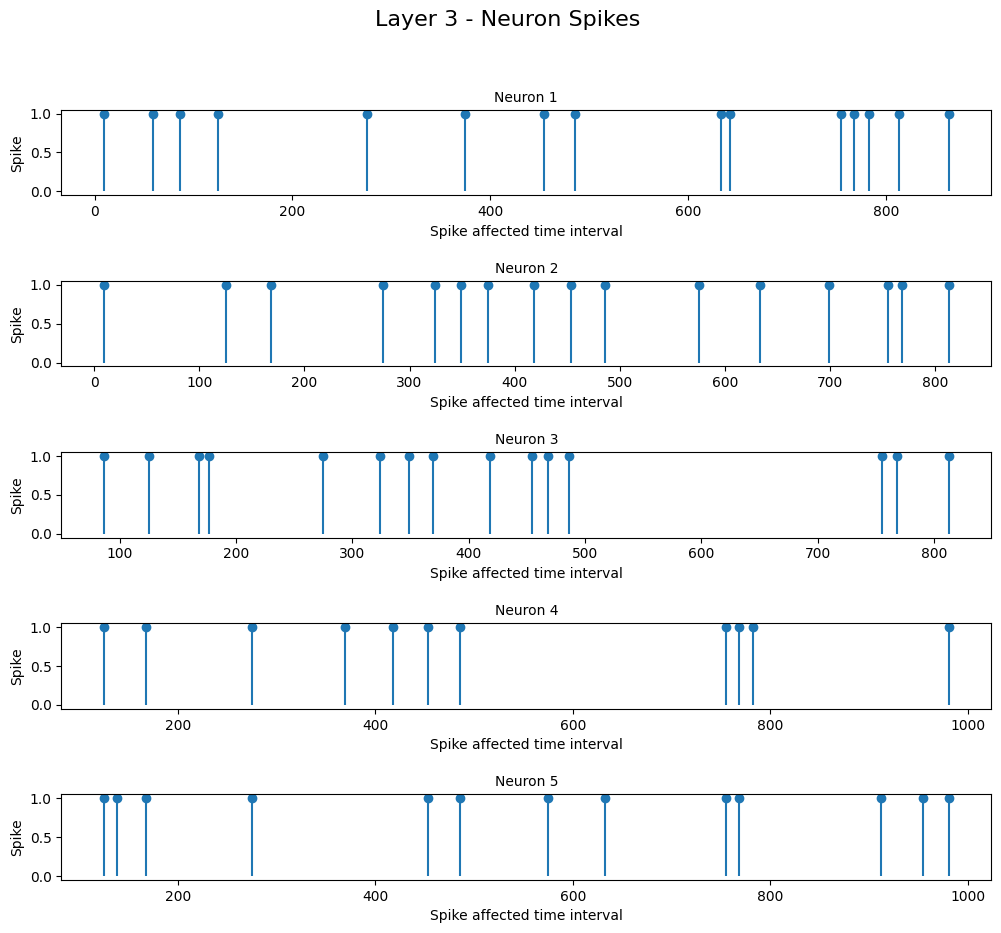

In [150]:
stem_plot_layer_spikes(spk,3)